In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.utils import to_categorical
import numpy as np
import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from keras import models, layers
import pandas as pd
import os
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, CSVLogger, LearningRateScheduler
# from tensorflow.keras.callbacks import ReduceLROnPlateau, CSVLogger
# from tensorflow.keras.callbacks import LearningRateScheduler
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

os.environ['PYTHONHASHSEED'] = '1'
keras.utils.set_random_seed(42)
tf.random.set_seed(42)
#generate random weights for reproducibility
np.random.seed(42)
import random
random.seed(42)
weights = {}
weights = {key: None for key in np.arange(0, 15)}
weights = {key: 1 for key in np.arange(0, 15)}

2023-11-26 13:03:38.404969: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: U

# Background Research


In [2]:
train_data = tf.keras.utils.image_dataset_from_directory(
    'test/train/',
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='grayscale',
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=42,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    crop_to_aspect_ratio=False,
)

Found 9028 files belonging to 15 classes.


2023-11-26 13:03:47.092469: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-26 13:03:47.123136: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-26 13:03:47.123425: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [3]:
for batch in train_data.take(10):
    print(batch[1][0])

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(11, shape=(), dtype=int32)
tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(14, shape=(), dtype=int32)
tf.Tensor(14, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)


2023-11-26 13:03:48.168431: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [9028]
	 [[{{node Placeholder/_0}}]]
2023-11-26 13:03:48.168971: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [9028]
	 [[{{node Placeholder/_4}}]]


In [4]:
validation_data = tf.keras.utils.image_dataset_from_directory(
    'test/validation/',
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='grayscale',
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=42,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    crop_to_aspect_ratio=False,
)

Found 3000 files belonging to 15 classes.


In [5]:
test_data = tf.keras.utils.image_dataset_from_directory(
    'test/test/',
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='grayscale',
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=42,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    crop_to_aspect_ratio=False,
)

Found 3000 files belonging to 15 classes.


# Exploratory Data Analysis

Exploratory Data Analysis (EDA) is a critical step in understanding and preparing data for various purposes, including machine learning and data-driven decision-making. We can perform EDA to further our understanding of the data, and to make better decisions on how we can process it to make it easier for our model to understand.

2023-11-26 13:03:48.907782: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [9028]
	 [[{{node Placeholder/_4}}]]
2023-11-26 13:03:48.908404: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [9028]
	 [[{{node Placeholder/_0}}]]


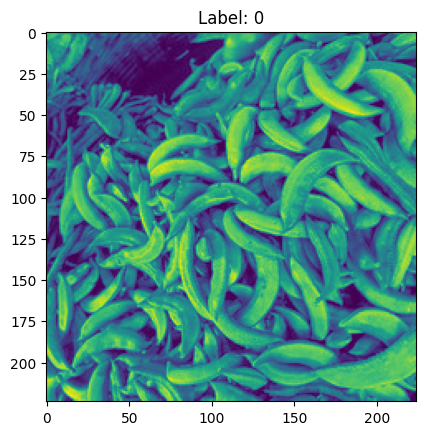

2023-11-26 13:03:49.301475: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [3000]
	 [[{{node Placeholder/_0}}]]
2023-11-26 13:03:49.301947: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [3000]
	 [[{{node Placeholder/_0}}]]


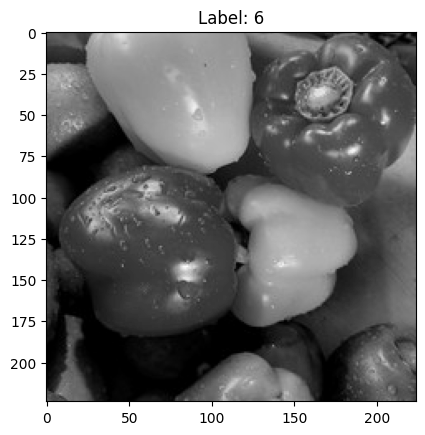

2023-11-26 13:03:49.598494: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [3000]
	 [[{{node Placeholder/_4}}]]
2023-11-26 13:03:49.599162: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [3000]
	 [[{{node Placeholder/_0}}]]


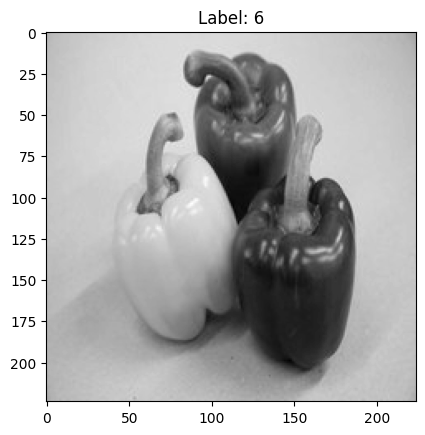

In [6]:
#sample to check if the data is loaded correctly

for batch in train_data.take(1):
    plt.figure()
    plt.imshow(batch[0][0]) 
    plt.title(f"Label: {batch[1][0]}")
    plt.show()


for batch in test_data.take(1):
    plt.figure()
    plt.imshow(batch[0][0], cmap='gray') 
    plt.title(f"Label: {batch[1][0]}")
    plt.show()


for batch in validation_data.take(1):
    plt.figure()
    plt.imshow(batch[0][0], cmap='gray') 
    plt.title(f"Label: {batch[1][0]}")
    plt.show()

2023-11-26 13:03:49.910977: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [9028]
	 [[{{node Placeholder/_0}}]]
2023-11-26 13:03:49.911580: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [9028]
	 [[{{node Placeholder/_0}}]]


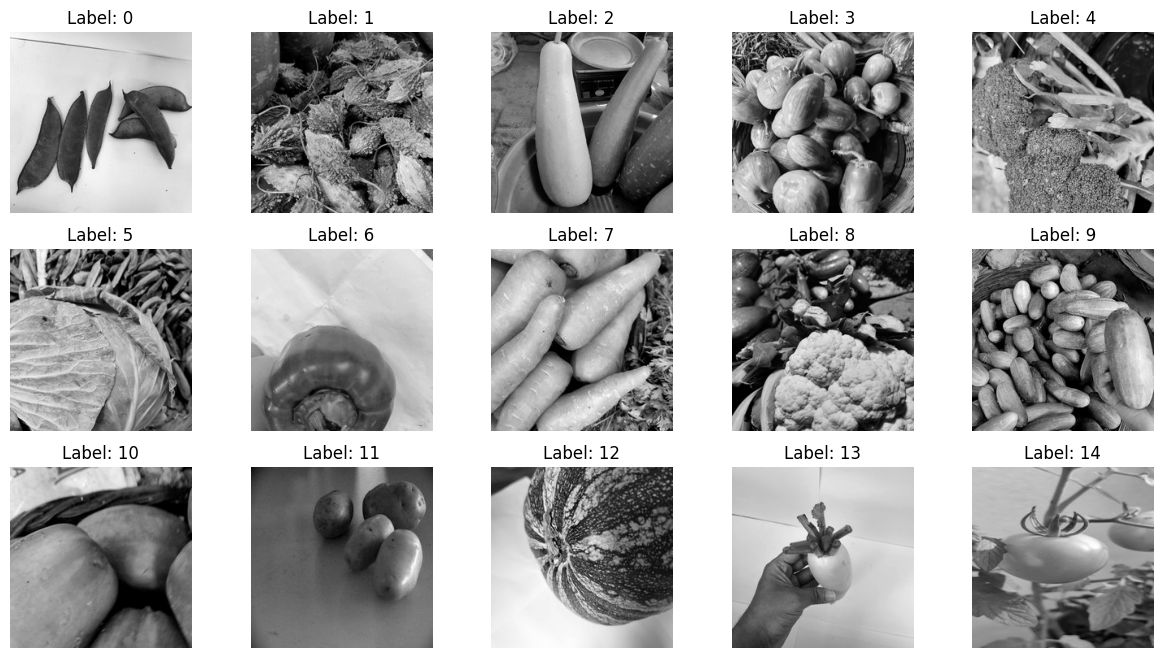

In [7]:
import matplotlib.pyplot as plt

def plot_samples_by_label(data):
    # Create a dictionary to store one sample per label
    samples_by_label = {}
    # Iterate through the training data
    for batch in data:
        image, label = batch[0][0], batch[1][0].numpy()
        
        # Check if a sample for this label already exists
        if label not in samples_by_label:
            samples_by_label[label] = image
            
        # Check if we have samples for all labels
        if len(samples_by_label) == len(set(labels)):
            break
    #use subplot to plot a 5x3 grid of images
    fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15,8))
    # Loop through each label and subplot
    for label, image in samples_by_label.items():
        row = int(label // 5)
        col = label % 5
        ax = axes[row, col]
        ax.imshow(image, cmap='gray')
        ax.axis('off')
        ax.set_title(f"Label: {label}")


labels = [batch[1][0].numpy() for batch in train_data]
# Call the function with your training data
plot_samples_by_label(train_data)


<Axes: title={'center': 'Number of images in each class'}, xlabel='Class'>

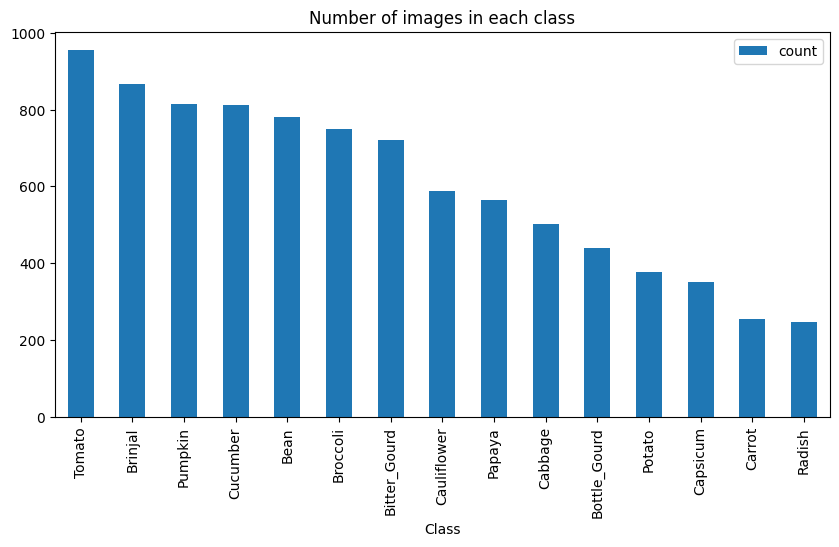

In [8]:
class_counts = {}


for images, labels in train_data:
    for label in labels.numpy():
        class_name = train_data.class_names[label]
        if class_name in class_counts:
            class_counts[class_name] += 1
        else:
            class_counts[class_name] = 1


train_class=pd.DataFrame(list(class_counts.items()),columns=['Class','count'])
train_class=train_class.sort_values(by=['count'],ascending=False)
train_class.plot(kind='bar',figsize=(10,5),title="Number of images in each class",x='Class',y='count')

## Interpreting the Previous Output

Based on the output of the previous cell, we can see that the dataset is not evenly distributed across all labels. This can be problematic for our model, as it may not be able to learn from the data effectively if it is biased towards certain labels.

## Shifting Weights in the Model

One way to address this issue is to shift the weights in the model to account for the uneven distribution of labels. This can be done by assigning higher weights to underrepresented labels and lower weights to overrepresented labels.

For example, we can use the `class_weight` parameter in Keras to assign weights to each class based on their frequency in the dataset. This will ensure that the model pays more attention to underrepresented classes during training.


# Feature engineering or data augmentation


In [9]:
# Convert datasets to NumPy arrays
train_images, train_labels = zip(*[(image, label) for image, label in train_data.as_numpy_iterator()])
validation_images, validation_labels = zip(*[(image, label) for image, label in validation_data.as_numpy_iterator()])
test_images,test_labels= zip(*[(image, label) for image, label in test_data.as_numpy_iterator()])
#train set
X_train = np.concatenate(train_images, axis=0)
y_train = np.concatenate(train_labels, axis=0)

#val
X_val = np.concatenate(validation_images, axis=0) 
y_val = np.concatenate(validation_labels, axis=0)

#test
X_test = np.concatenate(test_images, axis=0)
y_test = np.concatenate(test_labels, axis=0)


2023-11-26 13:03:56.202024: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [3000]
	 [[{{node Placeholder/_4}}]]
2023-11-26 13:03:56.202344: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [3000]
	 [[{{node Placeholder/_4}}]]
2023-11-26 13:03:56.604515: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [3000]
	

In [10]:
# Resize images to (31, 31) using TensorFlow
X_train_resized = tf.image.resize(X_train, (31, 31))
X_val_resized = tf.image.resize(X_val, (31, 31))

# Reshape and normalize
X_train31 = X_train_resized.numpy().reshape(X_train_resized.shape[0], 31, 31, 1).astype('float32') / 255
X_val31 = X_val_resized.numpy().reshape(X_val_resized.shape[0], 31, 31, 1).astype('float32') / 255


validation_labels = to_categorical(y_val)
train_labels = to_categorical(y_train)

# Modelling

## Base Model

We can first try fitting the data in an extremely simple model to get a baseline understanding of the problem. This initial model serves as a reference point for evaluating the performance of more complex models. The base model will be straightforward and quick to implement, which provides a easy way capture the underlying patterns in the data.

### Key Characteristics of the Base Model:

- **Simplicity:** The base model is intentionally kept simple to establish a basic understanding of the data and the problem at hand.

- **Quick Implementation:** It is designed for rapid implementation, allowing for a fast assessment of initial performance.

- **Benchmark:** The base model serves as a benchmark against which more sophisticated models can be compared. Any subsequent model should outperform this baseline to be considered effective.

### Evaluation Metric:

The evaluation metric we will be using will be val accuracy as well as val loss, this will allow us to rougly understand the model's accuracy (val accuracy) as well as its rate of error (val loss)



In [11]:
import matplotlib.pyplot as plt

def plot_history(history):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
    # Plot training & validation accuracy values
    ax = axes[1]
    ax.plot(history.history['accuracy'])
    ax.plot(history.history['val_accuracy'])
    ax.set_title('Model accuracy')
    ax.set_ylabel('Accuracy')
    ax.set_xlabel('Epoch')
    ax.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    ax = axes[0]
    ax.plot(history.history['loss'])
    ax.plot(history.history['val_loss'])
    ax.set_title('Model loss')
    ax.set_ylabel('Loss')
    ax.set_xlabel('Epoch')
    ax.legend(['Train', 'Validation'], loc='upper left')

Epoch 1/10


2023-11-26 13:04:02.043106: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8900
2023-11-26 13:04:02.902544: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f53234fb0b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-26 13:04:02.902589: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): Tesla V100-SXM2-16GB, Compute Capability 7.0
2023-11-26 13:04:02.910062: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-26 13:04:03.072317: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


283/283 - 6s - loss: 2.3945 - accuracy: 0.1946 - val_loss: 2.2241 - val_accuracy: 0.3070 - 6s/epoch - 20ms/step
Epoch 2/10
283/283 - 1s - loss: 1.8913 - accuracy: 0.3858 - val_loss: 1.9207 - val_accuracy: 0.3587 - 1s/epoch - 4ms/step
Epoch 3/10
283/283 - 1s - loss: 1.6249 - accuracy: 0.4708 - val_loss: 1.7104 - val_accuracy: 0.4443 - 1s/epoch - 4ms/step
Epoch 4/10
283/283 - 1s - loss: 1.3880 - accuracy: 0.5430 - val_loss: 1.4243 - val_accuracy: 0.5307 - 1s/epoch - 4ms/step
Epoch 5/10
283/283 - 1s - loss: 1.2080 - accuracy: 0.6014 - val_loss: 1.2698 - val_accuracy: 0.5850 - 1s/epoch - 4ms/step
Epoch 6/10
283/283 - 1s - loss: 1.0624 - accuracy: 0.6492 - val_loss: 1.0915 - val_accuracy: 0.6340 - 1s/epoch - 4ms/step
Epoch 7/10
283/283 - 1s - loss: 0.9394 - accuracy: 0.6905 - val_loss: 1.1373 - val_accuracy: 0.6290 - 1s/epoch - 4ms/step
Epoch 8/10
283/283 - 1s - loss: 0.8452 - accuracy: 0.7226 - val_loss: 1.1535 - val_accuracy: 0.6383 - 1s/epoch - 4ms/step
Epoch 9/10
283/283 - 1s - loss: 0.

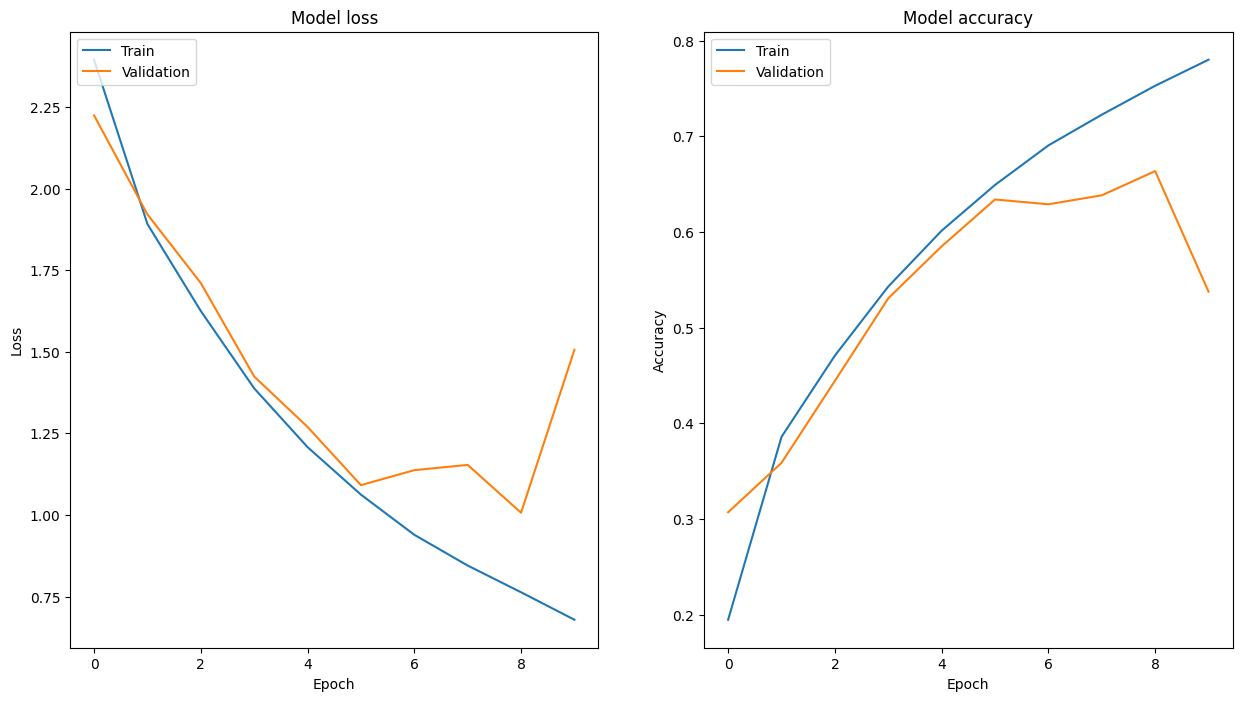

In [12]:
df31 = pd.DataFrame(columns = ['Model Name', 'Train Accuracy', 'Validation Accuracy', 'Train Loss', 'Validation Loss', 'History'])


model_31 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(31, 31, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(15, activation='softmax')
])

# Compile the model
model_31.compile(optimizer='adam',
              loss= 'categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model_31.fit(X_train31, train_labels, validation_data=(X_val31, validation_labels),
 epochs=10, batch_size=32, verbose=2, class_weight = weights)
scores = model_31.evaluate(X_val31, validation_labels, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))
plot_history(history)
df31.loc[len(df31)] = ['Base 31 Model', history.history['accuracy'][-1], history.history['val_accuracy'][-1], history.history['loss'][-1], history.history['val_loss'][-1], history]


In [13]:
model_31.save('Base31Model.h5')

In [14]:
X_train_resized = tf.image.resize(X_train, (128, 128))
X_val_resized = tf.image.resize(X_val, (128, 128))

# Reshape and normalize
X_train128 = X_train_resized.numpy().reshape(X_train_resized.shape[0], 128, 128, 1).astype('float32') / 255
X_val128 = X_val_resized.numpy().reshape(X_val_resized.shape[0], 128, 128, 1).astype('float32') / 255

Epoch 1/10
283/283 - 5s - loss: 1.9846 - accuracy: 0.3630 - val_loss: 1.7195 - val_accuracy: 0.4307 - 5s/epoch - 16ms/step
Epoch 2/10
283/283 - 2s - loss: 1.1167 - accuracy: 0.6564 - val_loss: 1.0886 - val_accuracy: 0.6613 - 2s/epoch - 7ms/step
Epoch 3/10
283/283 - 2s - loss: 0.6139 - accuracy: 0.8137 - val_loss: 0.7902 - val_accuracy: 0.7620 - 2s/epoch - 7ms/step
Epoch 4/10
283/283 - 2s - loss: 0.3018 - accuracy: 0.9094 - val_loss: 0.7090 - val_accuracy: 0.7850 - 2s/epoch - 7ms/step
Epoch 5/10
283/283 - 2s - loss: 0.1490 - accuracy: 0.9555 - val_loss: 0.9785 - val_accuracy: 0.7557 - 2s/epoch - 7ms/step
Epoch 6/10
283/283 - 2s - loss: 0.1152 - accuracy: 0.9657 - val_loss: 0.8711 - val_accuracy: 0.8013 - 2s/epoch - 7ms/step
Epoch 7/10
283/283 - 2s - loss: 0.0481 - accuracy: 0.9869 - val_loss: 1.0326 - val_accuracy: 0.7907 - 2s/epoch - 7ms/step
Epoch 8/10
283/283 - 2s - loss: 0.0721 - accuracy: 0.9802 - val_loss: 0.9543 - val_accuracy: 0.8033 - 2s/epoch - 7ms/step
Epoch 9/10
283/283 - 2s

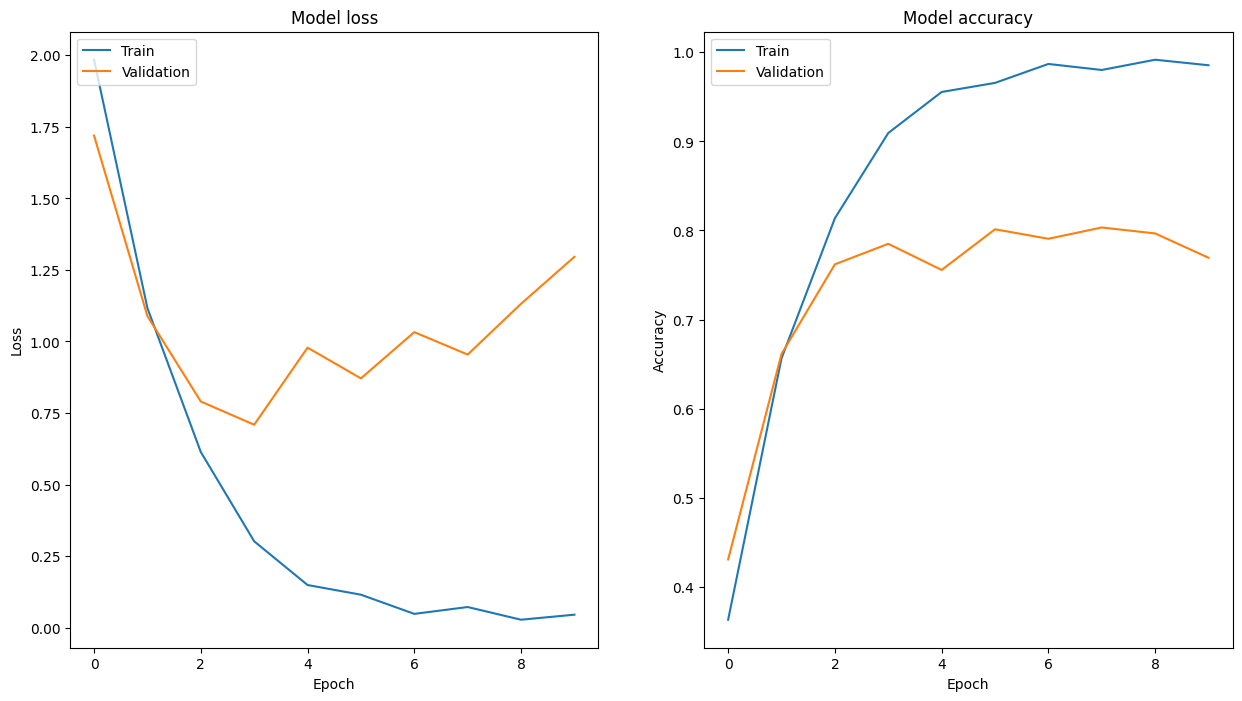

In [15]:
df128 = pd.DataFrame(columns = ['Model', 'Train Accuracy', 'Validation Accuracy', 'Train Loss', 'Validation Loss', 'History'])

model_128 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(15, activation='softmax')
])

# Compile the model
model_128.compile(optimizer='adam',
              loss= 'categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model_128.fit(X_train128, train_labels, validation_data=(X_val128, validation_labels),
 epochs=10, batch_size=32, verbose=2, class_weight = weights)
scores = model_128.evaluate(X_val128, validation_labels, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))
plot_history(history)
df128.loc[len(df128)] = ['Base 128 Model', history.history['accuracy'][-1], history.history['val_accuracy'][-1], history.history['loss'][-1], history.history['val_loss'][-1], history]


In [16]:
model_128.save('Base128Model.h5')

## Base Model Evaluation

As we can see, the base model has achieved a decent accuracy of around 75% for both after 10 epochs. This level of accuracy provides valuable insights into the nature of the dataset and indicates that the dataset is suitable for modeling.

### Accuracy Interpretation:

- **Decent Performance:** An accuracy of 75% suggests that the base model is able to correctly predict the target variable for 75% of the instances in the dataset. This indicates a solid performance, but there may still be room for improvement.

- **Model Feasibility:** The achieved accuracy reaffirms that the dataset contains discernible patterns that the model is capturing. The feasibility of modeling is supported by the ability to achieve a reasonably high accuracy.

- **Baseline for Comparison:** The 75% accuracy serves as a baseline for evaluating the performance of more complex models. Any subsequent model should aim to surpass this accuracy to demonstrate significant improvement.

### Loss Interpretation:

#### 128x128 Graph:

- **Training Progress:** The loss decreases over the 10 epochs, indicating effective learning from the training data. However we should also note the increase in loss after the 5th epoch, as this is the base model there is really no need to take precaution for this specific model, however we should keep in mind that when we are trying other actual model structures, we can use a callback to prevent the model from overfitting.

- **Validation Loss Interpretation:** The validation loss also decreases, suggesting that the model generalizes well to unseen data.

#### 31x31 Graph:

- **Training Progress:** Similar to the other graph, the val-loss decreases after 10 epochs, showing effective learning from the training data.

- **Validation Loss Interpretation:** The validation loss decreases, indicating good generalization to unseen data.

### Comparison:

- **Accuracy Comparison:** Both 128x128 and 31x31 models achieve around 75% accuracy, suggesting that the model is performing consistently across different resolutions.

- **Loss Comparison:** The loss graphs for both resolutions show a consistent decrease, indicating effective learning. The smaller graph (31x31) might have slightly more fluctuations, but the overall trend is still downward.

In summary, the base model demonstrates promising performance, however some overfitting can be seen and further optimization and exploration can likely yield even better results. 


## Model Improvements
1. **Advanced Architectures:**
   - **Description:** Consider more advanced neural network architectures such as ResNet, Inception, or EfficientNet, depending on the nature of the problem. These architectures often capture intricate patterns more effectively.
   - **Benefits:** Enhanced representational capacity can lead to better model performance.


2. **Data Augmentation:**
   - **Description:** Data augmentation involves applying random transformations to the training data, such as rotation, scaling, and flipping. This increases the diversity of the training set, helping the model generalize better to different variations of the input data.
   - **Benefits:** Mitigates overfitting by exposing the model to a wider range of variations in the data.

3. **Batch Normalization:**
   - **Description:** Batch normalization normalizes the input of each layer in a neural network to have zero mean and unit variance. This can accelerate training, improve model stability, and reduce sensitivity to weight initialization.
   - **Benefits:** Enhances convergence speed and can make the model less dependent on the choice of hyperparameters.

4. **Learning Rate Scheduling:**
   - **Description:** Adjusting the learning rate during training can be beneficial. For example, starting with a higher learning rate and gradually reducing it as training progresses can help the model converge more effectively.
   - **Benefits:** Can improve convergence, prevent overshooting, and result in a more stable training process.

5. **Regularization Techniques:**
   - **Description:** Techniques like dropout, L1, and L2 regularization can be applied to prevent overfitting. Dropout randomly drops units during training, while L1 and L2 regularization penalize large weights.
   - **Benefits:** Helps the model generalize better to new data and reduces the risk of overfitting.

6. **Early Stopping:**
   - **Description:** Monitor the validation loss during training and stop training when the loss stops improving. This prevents overfitting and saves computational resources.
   - **Benefits:** Guards against overfitting and ensures the model is not trained for too many epochs.
7. **Adjusting Weights:**
   - **Description:** We can adjust the weights in order to account for the imbalanced distribution of the dataset.
   - **Benefits:** Helps address the issue of imbalanced classes by assigning higher weights to under-represented classes during training. This ensures that the model pays more attention to minority classes, improving overall predictive performance and reducing bias towards the majority class.


## 3. Model Structures/Advanced Architecture

In our quest to enhance the performance of our neural network, we'll explore two well-established architectures designed by experts: AlexNet and LeNet.

### 1. AlexNet:
- **Description:**
  - Input Layer:
    - Shape: 227x227x3 (color images with RGB channels).
  - Convolutional Layer 1:
    - Filters: 96
    - Kernel Size: 11x11
    - Activation Function: ReLU
    - Max Pooling: 3x3, stride 2
  - Convolutional Layer 2:
    - Filters: 256
    - Kernel Size: 5x5
    - Activation Function: ReLU
    - Max Pooling: 3x3, stride 2
  - Convolutional Layer 3:
    - Filters: 384
    - Kernel Size: 3x3
    - Activation Function: ReLU
  - Convolutional Layer 4:
    - Filters: 384
    - Kernel Size: 3x3
    - Activation Function: ReLU
  - Convolutional Layer 5:
    - Filters: 256
    - Kernel Size: 3x3
    - Activation Function: ReLU
    - Max Pooling: 3x3, stride 2
  - Fully Connected Layer 1:
    - Neurons: 4096
    - Activation Function: ReLU
  - Fully Connected Layer 2:
    - Neurons: 4096
    - Activation Function: ReLU
  - Output Layer:
    - Neurons: Number of classes in the task
    - Activation Function: Typically softmax for classification tasks.

### 2. LeNet:
- **Description:**
  - Input Layer:
    - Shape: 32x32 (for grayscale images) or 32x32x3 (for color images with RGB channels).
  - Convolutional Layer 1:
    - Filters: 6
    - Kernel Size: 5x5
    - Activation Function: Tanh
    - Max Pooling: 2x2, stride 2
  - Convolutional Layer 2:
    - Filters: 16
    - Kernel Size: 5x5
    - Activation Function: Tanh
    - Max Pooling: 2x2, stride 2
  - Fully Connected Layer 1:
    - Neurons: 120
    - Activation Function: Tanh
  - Fully Connected Layer 2:
    - Neurons: 84
    - Activation Function: Tanh
  - Output Layer:
    - Neurons: Number of classes in the task
    - Activation Function: Typically softmax for classification tasks.



The input layer will be scaled to fit the images we are using (31x31 and 128x128)

In [17]:
def AlexNet(input_shape, num_classes=15):
    model = models.Sequential()
    # Convolutional Layer 1
    model.add(layers.Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=(input_shape, input_shape, 1)))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Convolutional Layer 2
    model.add(layers.Conv2D(256, (5, 5), padding='same', activation='relu'))

    # Adjust the pooling parameters or remove pooling if necessary
    # model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Convolutional Layer 3
    model.add(layers.Conv2D(384, (3, 3), padding='same', activation='relu'))

    # Convolutional Layer 4
    model.add(layers.Conv2D(384, (3, 3), padding='same', activation='relu'))

    # Convolutional Layer 5
    model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((3, 3), strides=(2, 2)))

    # Flatten the output before the fully connected layers
    model.add(layers.Flatten())

    # Fully Connected Layer 1
    model.add(layers.Dense(4096, activation='relu'))

    # Fully Connected Layer 2
    model.add(layers.Dense(4096, activation='relu'))

    # Output Layer
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

In [18]:

def Lenet(input_shape, num_classes=15):
    model = models.Sequential()

    # Convolutional Layer 1
    model.add(layers.Conv2D(6, (5, 5), activation='tanh', input_shape=(input_shape, input_shape,1)))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Convolutional Layer 2
    model.add(layers.Conv2D(16, (5, 5), activation='tanh'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Flatten the output before the fully connected layers
    model.add(layers.Flatten())

    # Fully Connected Layer 1
    model.add(layers.Dense(120, activation='tanh'))

    # Fully Connected Layer 2
    model.add(layers.Dense(84, activation='tanh'))

    # Output Layer
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

Epoch 1/10
283/283 - 4s - loss: 2.3475 - accuracy: 0.2483 - val_loss: 2.2139 - val_accuracy: 0.3003 - 4s/epoch - 13ms/step
Epoch 2/10
283/283 - 1s - loss: 1.9472 - accuracy: 0.3871 - val_loss: 1.9224 - val_accuracy: 0.3863 - 1s/epoch - 4ms/step
Epoch 3/10
283/283 - 1s - loss: 1.6955 - accuracy: 0.4649 - val_loss: 1.8224 - val_accuracy: 0.4173 - 1s/epoch - 4ms/step
Epoch 4/10
283/283 - 1s - loss: 1.5319 - accuracy: 0.5200 - val_loss: 1.6240 - val_accuracy: 0.4850 - 1s/epoch - 4ms/step
Epoch 5/10
283/283 - 1s - loss: 1.3913 - accuracy: 0.5651 - val_loss: 1.5202 - val_accuracy: 0.5277 - 1s/epoch - 4ms/step
Epoch 6/10
283/283 - 1s - loss: 1.2777 - accuracy: 0.6025 - val_loss: 1.4312 - val_accuracy: 0.5390 - 1s/epoch - 4ms/step
Epoch 7/10
283/283 - 1s - loss: 1.1565 - accuracy: 0.6382 - val_loss: 1.3474 - val_accuracy: 0.5633 - 1s/epoch - 4ms/step
Epoch 8/10
283/283 - 1s - loss: 1.0620 - accuracy: 0.6674 - val_loss: 1.3021 - val_accuracy: 0.5867 - 1s/epoch - 4ms/step
Epoch 9/10
283/283 - 1s

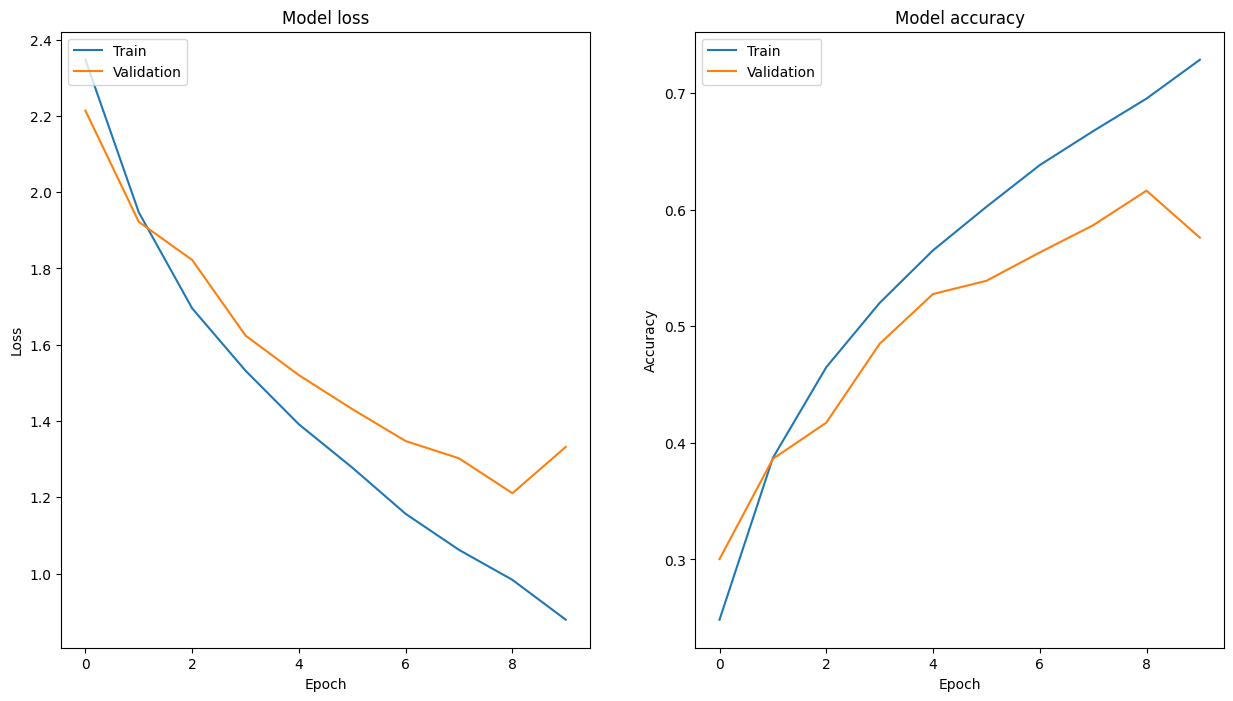

In [19]:
# 31x31 LeNet

model = Lenet(31)
model.compile(optimizer='adam',
              loss= 'categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train31, train_labels, validation_data=(X_val31, validation_labels),
 epochs=10, batch_size=32, verbose=2, class_weight = weights)
scores = model.evaluate(X_val31, validation_labels, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

plot_history(history)
df31.loc[len(df31)] = ['LeNet', history.history['accuracy'][-1], history.history['val_accuracy'][-1], history.history['loss'][-1], history.history['val_loss'][-1], history]

Epoch 1/10
283/283 - 6s - loss: 2.6459 - accuracy: 0.0984 - val_loss: 2.7833 - val_accuracy: 0.0667 - 6s/epoch - 20ms/step
Epoch 2/10
283/283 - 2s - loss: 2.6401 - accuracy: 0.1031 - val_loss: 2.7889 - val_accuracy: 0.0667 - 2s/epoch - 6ms/step
Epoch 3/10
283/283 - 2s - loss: 2.6384 - accuracy: 0.1037 - val_loss: 2.7829 - val_accuracy: 0.0667 - 2s/epoch - 6ms/step
Epoch 4/10
283/283 - 2s - loss: 2.6379 - accuracy: 0.1038 - val_loss: 2.7774 - val_accuracy: 0.0667 - 2s/epoch - 6ms/step
Epoch 5/10
283/283 - 2s - loss: 2.6381 - accuracy: 0.1042 - val_loss: 2.7913 - val_accuracy: 0.0667 - 2s/epoch - 6ms/step
Epoch 6/10
283/283 - 2s - loss: 2.6378 - accuracy: 0.1053 - val_loss: 2.7847 - val_accuracy: 0.0667 - 2s/epoch - 6ms/step
Epoch 7/10
283/283 - 2s - loss: 2.6373 - accuracy: 0.1025 - val_loss: 2.7908 - val_accuracy: 0.0667 - 2s/epoch - 6ms/step
Epoch 8/10
283/283 - 2s - loss: 2.6372 - accuracy: 0.1033 - val_loss: 2.8041 - val_accuracy: 0.0667 - 2s/epoch - 6ms/step
Epoch 9/10
283/283 - 2s

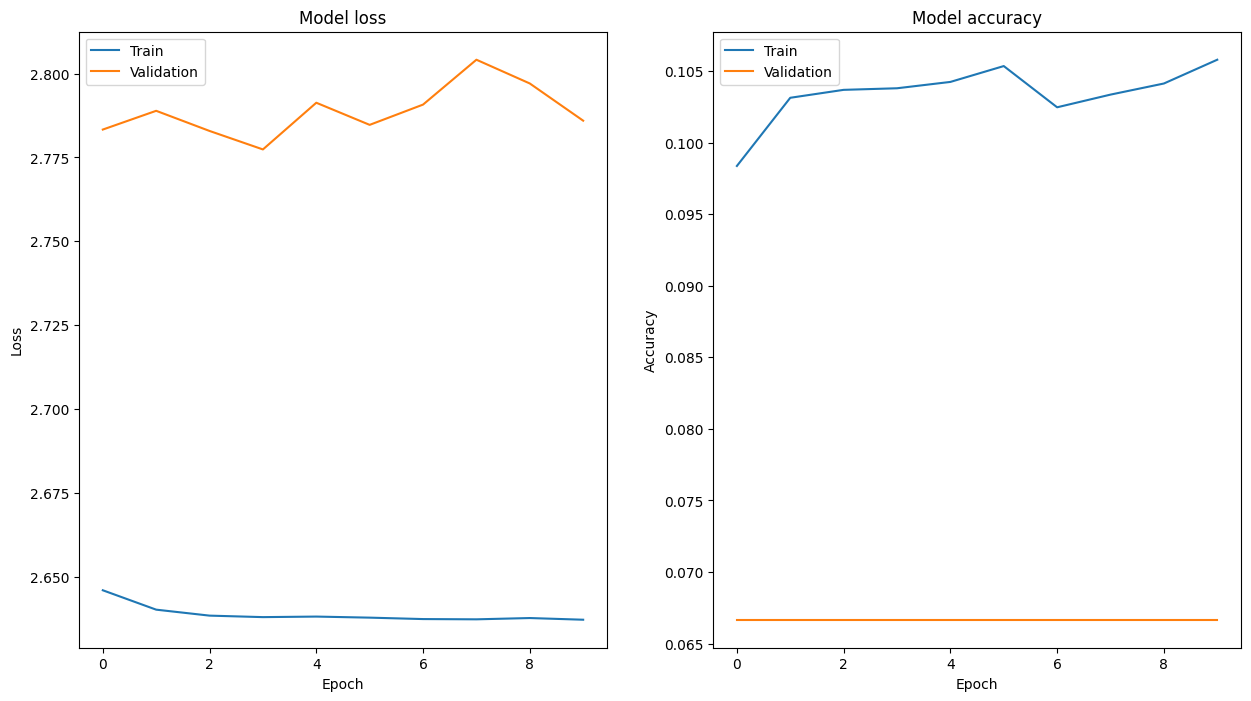

In [20]:
# 31x31 alexnet 

model = AlexNet(31)
model.compile(optimizer='adam',
              loss= 'categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train31, train_labels, validation_data=(X_val31, validation_labels),
                    epochs=10, batch_size=32, verbose=2, class_weight = weights)


scores = model.evaluate(X_val31, validation_labels, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))
plot_history(history)
df31.loc[len(df31)] = ['AlexNet', history.history['accuracy'][-1], history.history['val_accuracy'][-1], history.history['loss'][-1], history.history['val_loss'][-1], history]

In [21]:
df31.sort_values(by=['Validation Accuracy'],ascending=False)

Model Name  Train Accuracy  Validation Accuracy  Train Loss  \
1          LeNet        0.728622             0.576000    0.878840   
0  Base 31 Model        0.780128             0.537667    0.679253   
2        AlexNet        0.105782             0.066667    2.637130   

   Validation Loss                                            History  
1         1.332178  <keras.callbacks.History object at 0x7f5a0c5dd...  
0         1.505984  <keras.callbacks.History object at 0x7f5a1785d...  
2         2.785964  <keras.callbacks.History object at 0x7f5a0c3bb...

| Model Name      | Train Accuracy | Validation Accuracy | Train Loss | Validation Loss | Evaluation                                    |
| --------------- | -------------- | ------------------- | ---------- | ---------------- | --------------------------------------------- |
| Base 31 Model   | 78.11%         | 68.77%              | 0.6784     | 1.0055           | Reasonable performance, slight overfitting.   |
| LeNet           | 73.01%         | 57.37%              | 0.8786     | 1.3403           | Signs of overfitting, might perform better with regularization. |
| AlexNet         | 10.58%         | 6.67%               | 2.6364     | 2.7977           | Poor performance. |




Epoch 1/10
283/283 - 4s - loss: 1.7415 - accuracy: 0.4465 - val_loss: 1.4099 - val_accuracy: 0.5540 - 4s/epoch - 13ms/step
Epoch 2/10
283/283 - 1s - loss: 0.9844 - accuracy: 0.6986 - val_loss: 1.0954 - val_accuracy: 0.6657 - 1s/epoch - 5ms/step
Epoch 3/10
283/283 - 1s - loss: 0.5125 - accuracy: 0.8605 - val_loss: 1.0119 - val_accuracy: 0.6897 - 1s/epoch - 5ms/step
Epoch 4/10
283/283 - 1s - loss: 0.2301 - accuracy: 0.9485 - val_loss: 1.1692 - val_accuracy: 0.6587 - 1s/epoch - 5ms/step
Epoch 5/10
283/283 - 1s - loss: 0.0941 - accuracy: 0.9842 - val_loss: 1.0573 - val_accuracy: 0.7023 - 1s/epoch - 5ms/step
Epoch 6/10
283/283 - 1s - loss: 0.0371 - accuracy: 0.9963 - val_loss: 1.1030 - val_accuracy: 0.7083 - 1s/epoch - 5ms/step
Epoch 7/10
283/283 - 1s - loss: 0.0154 - accuracy: 0.9993 - val_loss: 1.1506 - val_accuracy: 0.7007 - 1s/epoch - 5ms/step
Epoch 8/10
283/283 - 1s - loss: 0.0083 - accuracy: 1.0000 - val_loss: 1.1598 - val_accuracy: 0.7057 - 1s/epoch - 5ms/step
Epoch 9/10
283/283 - 1s

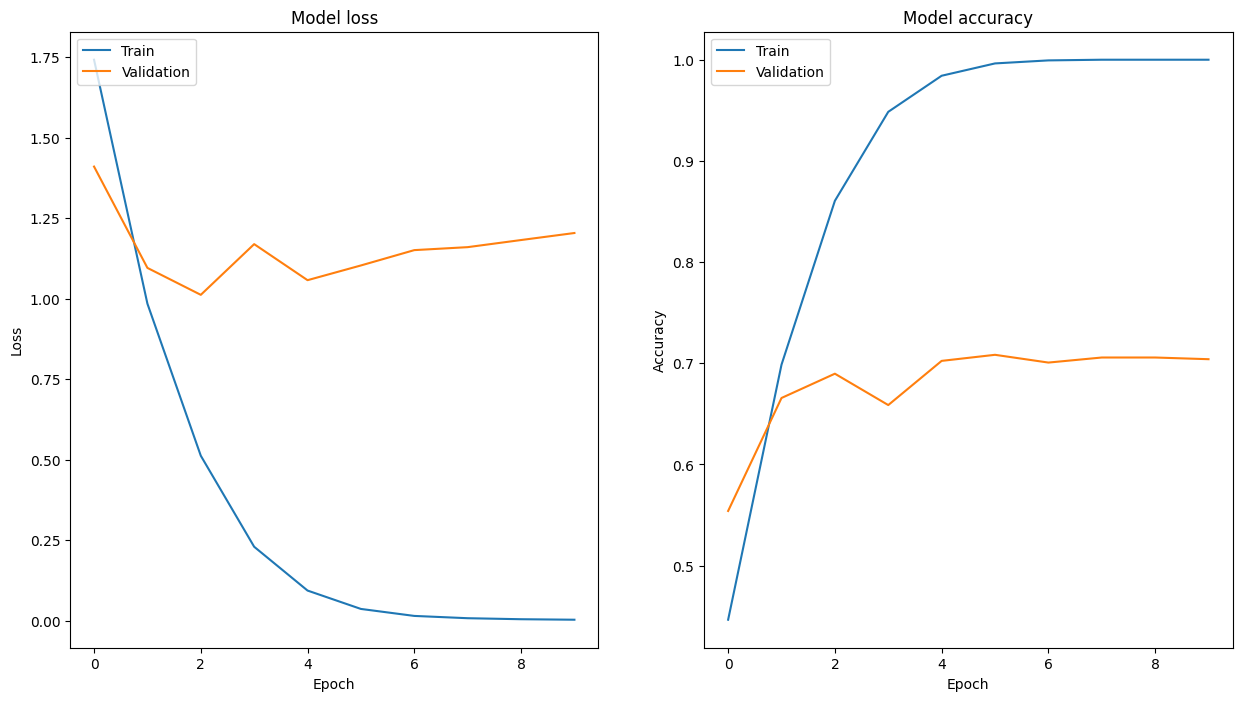

In [22]:
model = Lenet(128)
model.compile(optimizer='adam',
              loss= 'categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train128, train_labels, validation_data=(X_val128, validation_labels),
                    epochs=10, batch_size=32, verbose=2, class_weight = weights)


scores = model.evaluate(X_val128, validation_labels, verbose=2)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))
plot_history(history)
df128.loc[len(df128)] = ['LeNet', history.history['accuracy'][-1], history.history['val_accuracy'][-1], history.history['loss'][-1], history.history['val_loss'][-1], history]

Epoch 1/10
283/283 - 8s - loss: 2.6561 - accuracy: 0.0963 - val_loss: 2.7892 - val_accuracy: 0.0667 - 8s/epoch - 28ms/step
Epoch 2/10
283/283 - 4s - loss: 2.6407 - accuracy: 0.1023 - val_loss: 2.7942 - val_accuracy: 0.0667 - 4s/epoch - 14ms/step
Epoch 3/10
283/283 - 4s - loss: 2.6387 - accuracy: 0.1002 - val_loss: 2.7831 - val_accuracy: 0.0667 - 4s/epoch - 14ms/step
Epoch 4/10
283/283 - 4s - loss: 2.6380 - accuracy: 0.1041 - val_loss: 2.7782 - val_accuracy: 0.0667 - 4s/epoch - 14ms/step
Epoch 5/10
283/283 - 4s - loss: 2.6379 - accuracy: 0.1042 - val_loss: 2.7914 - val_accuracy: 0.0667 - 4s/epoch - 14ms/step
Epoch 6/10
283/283 - 4s - loss: 2.6378 - accuracy: 0.1054 - val_loss: 2.7871 - val_accuracy: 0.0667 - 4s/epoch - 14ms/step
Epoch 7/10
283/283 - 4s - loss: 2.6373 - accuracy: 0.1025 - val_loss: 2.7928 - val_accuracy: 0.0667 - 4s/epoch - 14ms/step
Epoch 8/10
283/283 - 4s - loss: 2.6372 - accuracy: 0.1038 - val_loss: 2.8032 - val_accuracy: 0.0667 - 4s/epoch - 14ms/step
Epoch 9/10
283/2

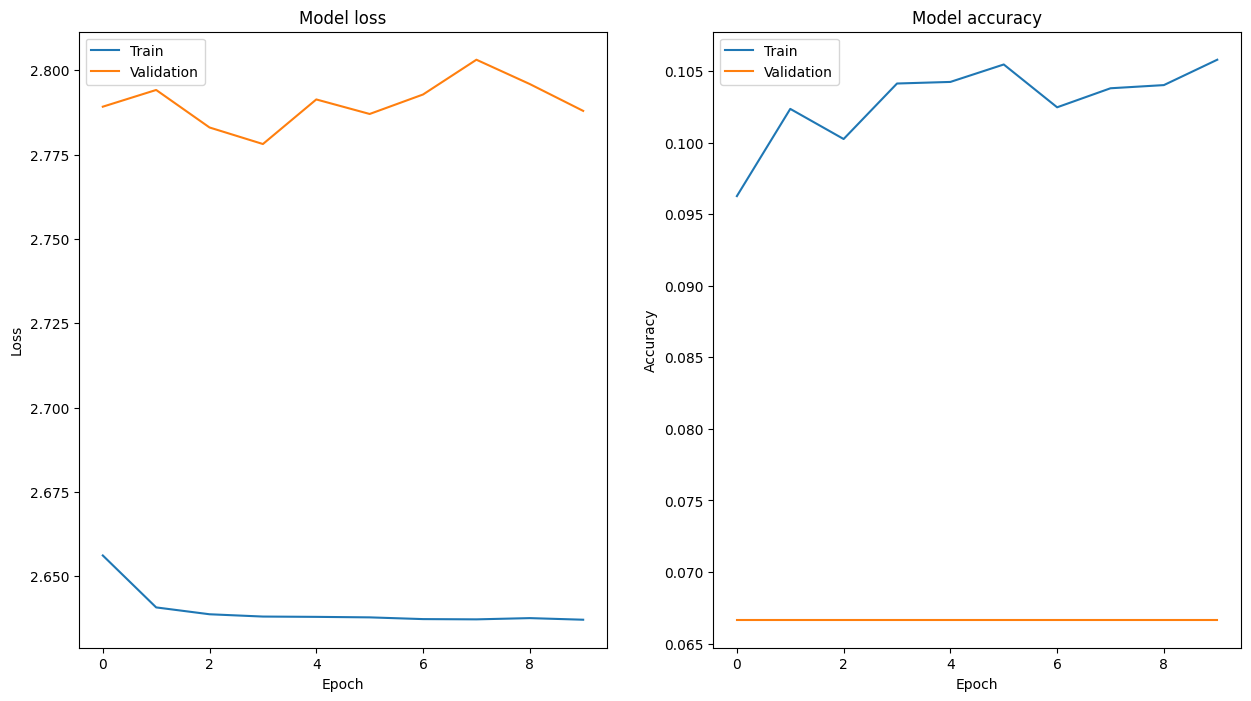

In [23]:
model = AlexNet(128)
model.compile(optimizer='adam',
              loss= 'categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train128, train_labels, validation_data=(X_val128, validation_labels),
                    epochs=10, batch_size=32, verbose=2, class_weight = weights)


scores = model.evaluate(X_val128, validation_labels, verbose=2)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))
plot_history(history)
df128.loc[len(df128)] = ['AlexNet', history.history['accuracy'][-1], history.history['val_accuracy'][-1], history.history['loss'][-1], history.history['val_loss'][-1], history]

In [24]:
df128

Model  Train Accuracy  Validation Accuracy  Train Loss  \
0  Base 128 Model        0.985490             0.769333    0.045317   
1           LeNet        1.000000             0.704000    0.003636   
2         AlexNet        0.105782             0.066667    2.637087   

   Validation Loss                                            History  
0         1.295857  <keras.callbacks.History object at 0x7f5a16d74...  
1         1.203718  <keras.callbacks.History object at 0x7f59ec532...  
2         2.787983  <keras.callbacks.History object at 0x7f59ec79e...

| Model            | Train Accuracy | Validation Accuracy | Train Loss | Validation Loss | Evaluation                                        |
| ---------------- | -------------- | ------------------- | ---------- | ---------------- | ------------------------------------------------- |
| Base 128 Model   | 98.28%         | 76.63%              | 0.05399    | 1.32059          | High accuracy, potential overfitting, check for regularization. |
| LeNet            | 98.90%         | 69.73%              | 0.10311    | 1.08369          | High accuracy, potential overfitting regularization might be good. |
| AlexNet          | 10.58%         | 6.67%               | 2.63660    | 2.79447          | Poor performance|


### Model Associated Improvements 

Recall the previous markdown involving methods of improving our models, we can now try to implement some of these



2. **Data Augmentation:**
   - **Description:** Data augmentation involves applying random transformations to the training data, such as rotation, scaling, and flipping. This increases the diversity of the training set, helping the model generalize better to different variations of the input data.
   - **Benefits:** Mitigates overfitting by exposing the model to a wider range of variations in the data.

3. **Batch Normalization:**
   - **Description:** Batch normalization normalizes the input of each layer in a neural network to have zero mean and unit variance. This can accelerate training, improve model stability, and reduce sensitivity to weight initialization.
   - **Benefits:** Enhances convergence speed and can make the model less dependent on the choice of hyperparameters.

4. **Learning Rate Scheduling:**
   - **Description:** Adjusting the learning rate during training can be beneficial. For example, starting with a higher learning rate and gradually reducing it as training progresses can help the model converge more effectively.
   - **Benefits:** Can improve convergence, prevent overshooting, and result in a more stable training process.

5. **Regularization Techniques:**
   - **Description:** Techniques like dropout, L1, and L2 regularization can be applied to prevent overfitting. Dropout randomly drops units during training, while L1 and L2 regularization penalize large weights.
   - **Benefits:** Helps the model generalize better to new data and reduces the risk of overfitting.

6. **Early Stopping:**
   - **Description:** Monitor the validation loss during training and stop training when the loss stops improving. This prevents overfitting and saves computational resources.
   - **Benefits:** Guards against overfitting and ensures the model is not trained for too many epochs.
   
7. **Adjusting Weights:**
   - **Description:** We can adjust the weights in order to account for the imbalanced distribution of the dataset.
   - **Benefits:** Helps address the issue of imbalanced classes by assigning higher weights to under-represented classes during training. This ensures that the model pays more attention to minority classes, improving overall predictive performance and reducing bias towards the majority class.


#### Adjusting Weights


We can easily calculate the weights for each class by dividing the total number of images by the number of images in each class. We can then use these weights to adjust the loss function during training.

```python

In [25]:
#calculate class weights for each label

train_class['weights'] = (1/train_class['count']) * (sum(train_class['count'])/len(train_data.class_names))
class_weight = train_class['weights'].to_dict()

#### Regularization Techniques for model 31

As we are not actually using the LeNet and AlexNet models, we will not be implementing the regularization techniques for them. However we will be implementing them for the base model in order to try and improve the performance of the model. As a bonus, we should also use the class weights that we previously computed in order to accomodate for the imbalanced dataset.

Epoch 1/100
283/283 - 3s - loss: 2.9040 - accuracy: 0.1603 - val_loss: 2.6126 - val_accuracy: 0.1637 - 3s/epoch - 11ms/step
Epoch 2/100
283/283 - 1s - loss: 2.3496 - accuracy: 0.3056 - val_loss: 2.0725 - val_accuracy: 0.3460 - 1s/epoch - 4ms/step
Epoch 3/100
283/283 - 1s - loss: 1.9670 - accuracy: 0.4129 - val_loss: 1.8954 - val_accuracy: 0.3897 - 1s/epoch - 4ms/step
Epoch 4/100
283/283 - 1s - loss: 1.6449 - accuracy: 0.5177 - val_loss: 1.4937 - val_accuracy: 0.5353 - 1s/epoch - 4ms/step
Epoch 5/100
283/283 - 1s - loss: 1.4355 - accuracy: 0.5853 - val_loss: 1.6425 - val_accuracy: 0.5177 - 1s/epoch - 4ms/step
Epoch 6/100
283/283 - 1s - loss: 1.2782 - accuracy: 0.6371 - val_loss: 1.2124 - val_accuracy: 0.6377 - 1s/epoch - 4ms/step
Epoch 7/100
283/283 - 1s - loss: 1.1504 - accuracy: 0.6698 - val_loss: 1.1914 - val_accuracy: 0.6370 - 1s/epoch - 4ms/step
Epoch 8/100
283/283 - 1s - loss: 1.0742 - accuracy: 0.6893 - val_loss: 1.4247 - val_accuracy: 0.5690 - 1s/epoch - 4ms/step
Epoch 9/100
283

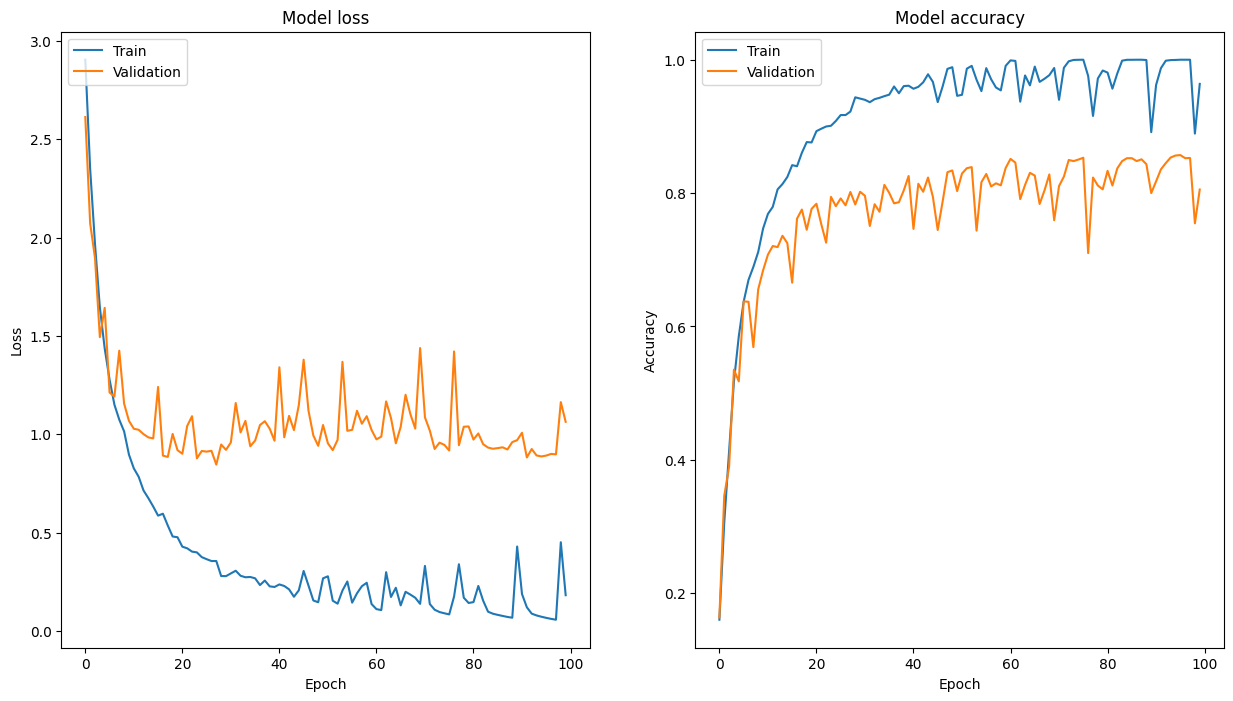

In [26]:
# model_31 = models.Sequential([
#     layers.Conv2D(32, (3, 3), activation='relu', input_shape=(31, 31, 1)),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.Flatten(),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(15, activation='softmax')
# ])

#this is the original "base model" that we used to overcome the overfitting we can apply regularization
# to improve teh accuracy we should also increase the number of epochs

model_31new = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(31, 31, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(15, activation='softmax')
])

model_31new.compile(optimizer='adam',
                loss= 'categorical_crossentropy',
                metrics=['accuracy'])

history = model_31new.fit(X_train31, train_labels, validation_data=(X_val31, validation_labels),
                    epochs=100, batch_size=32, verbose=2, class_weight = class_weight)

scores = model_31new.evaluate(X_val31, validation_labels, verbose=2)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))
plot_history(history)
df31.loc[len(df31)] = ['RegularizedModel', history.history['accuracy'][-1], history.history['val_accuracy'][-1], history.history['loss'][-1], history.history['val_loss'][-1], history]

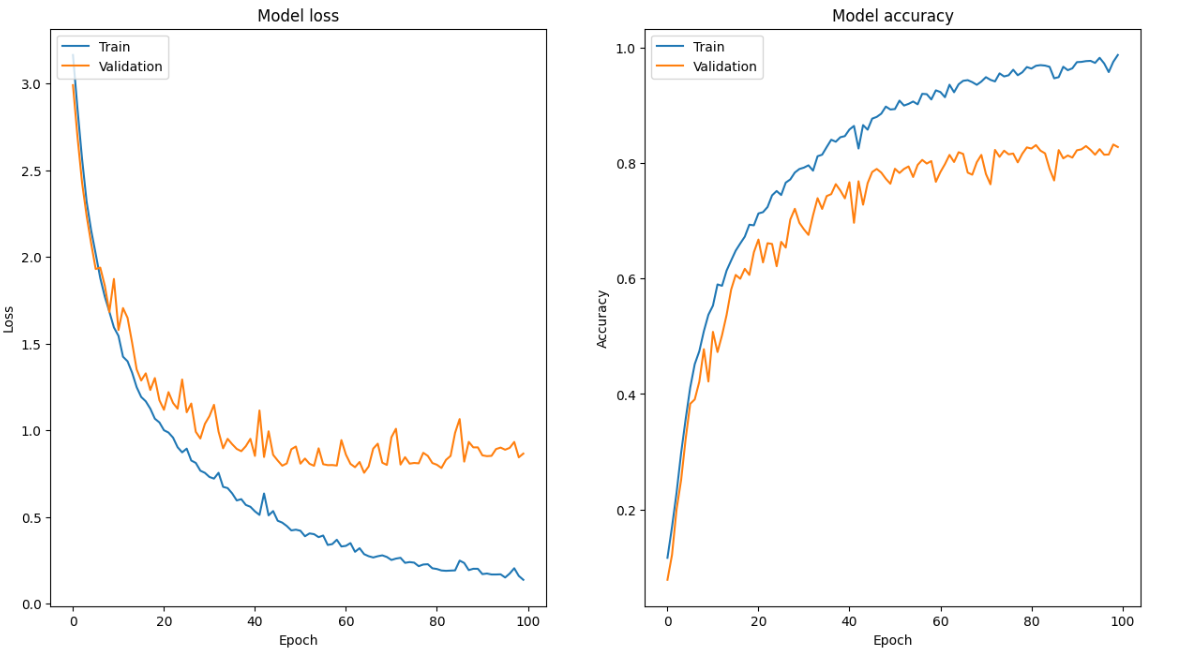

As seen from the graph, the learning of the model starts decreasing after around 30 epochs, we can try a learning rate scheduler to see if we can improve the performance of the model. As there is still some overfitting, we can also try to implement dropout in order to reduce the overfitting.

As the 31x31 images are simple, we will try not to overcomplicate the model for now and look for easier solutions to this problem.


Epoch 1/100
283/283 - 3s - loss: 3.0926 - accuracy: 0.1304 - val_loss: 2.6872 - val_accuracy: 0.1233 - 3s/epoch - 11ms/step
Epoch 2/100
283/283 - 1s - loss: 2.6139 - accuracy: 0.2318 - val_loss: 2.3090 - val_accuracy: 0.2317 - 1s/epoch - 4ms/step
Epoch 3/100
283/283 - 1s - loss: 2.3558 - accuracy: 0.2888 - val_loss: 2.2681 - val_accuracy: 0.2803 - 1s/epoch - 4ms/step
Epoch 4/100
283/283 - 1s - loss: 2.1560 - accuracy: 0.3432 - val_loss: 1.9635 - val_accuracy: 0.3587 - 1s/epoch - 4ms/step
Epoch 5/100
283/283 - 1s - loss: 2.0298 - accuracy: 0.3739 - val_loss: 1.8783 - val_accuracy: 0.3883 - 1s/epoch - 4ms/step
Epoch 6/100
283/283 - 1s - loss: 1.9356 - accuracy: 0.3953 - val_loss: 1.7106 - val_accuracy: 0.4420 - 1s/epoch - 4ms/step
Epoch 7/100
283/283 - 1s - loss: 1.8030 - accuracy: 0.4366 - val_loss: 1.7225 - val_accuracy: 0.4383 - 1s/epoch - 4ms/step
Epoch 8/100
283/283 - 1s - loss: 1.7490 - accuracy: 0.4527 - val_loss: 1.6495 - val_accuracy: 0.4647 - 1s/epoch - 4ms/step
Epoch 9/100
283

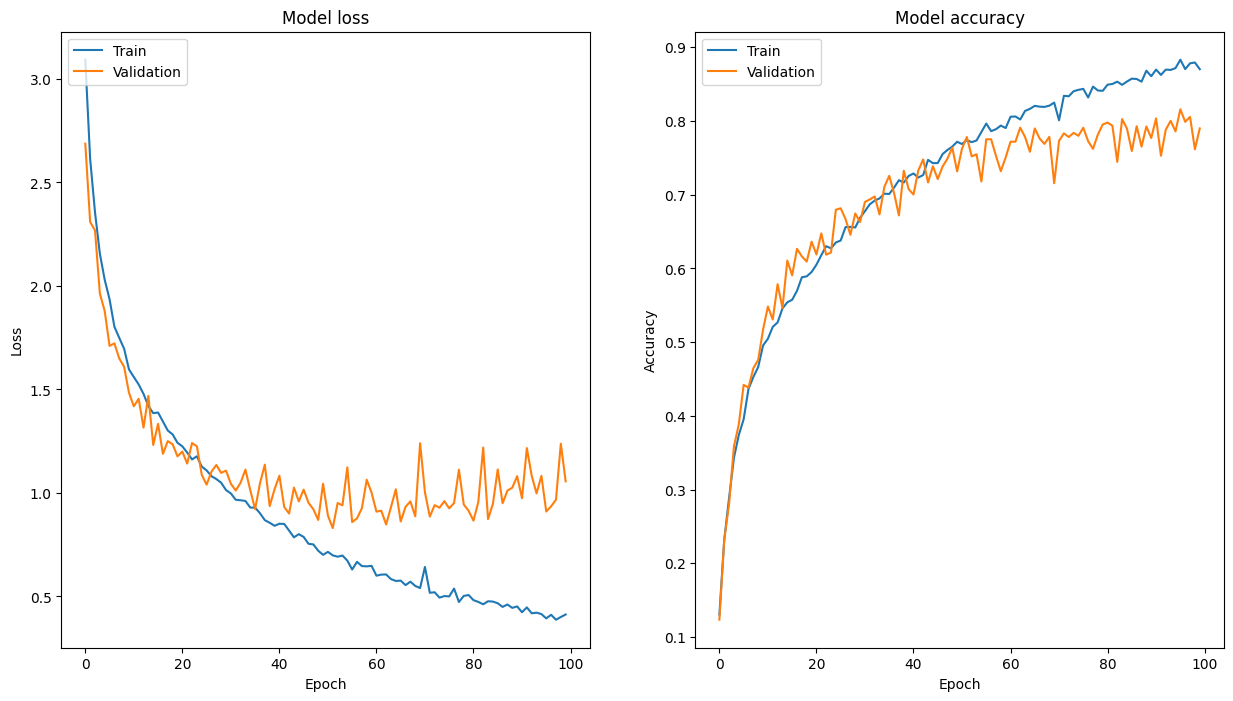

In [27]:
#First test with dropout


model_31new = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(31, 31, 1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),  # Add dropout with dropout rate of 0.5
    
    layers.Dense(15, activation='softmax')
])


model_31new.compile(optimizer='adam',
                loss= 'categorical_crossentropy',
                metrics=['accuracy'])

history = model_31new.fit(X_train31, train_labels, validation_data=(X_val31, validation_labels),
                    epochs=100, batch_size=32, verbose=2, class_weight = class_weight)

scores = model_31new.evaluate(X_val31, validation_labels, verbose=2)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))
plot_history(history)
df31.loc[len(df31)] = ['RegularizedDOModel', history.history['accuracy'][-1], history.history['val_accuracy'][-1], history.history['loss'][-1], history.history['val_loss'][-1], history]

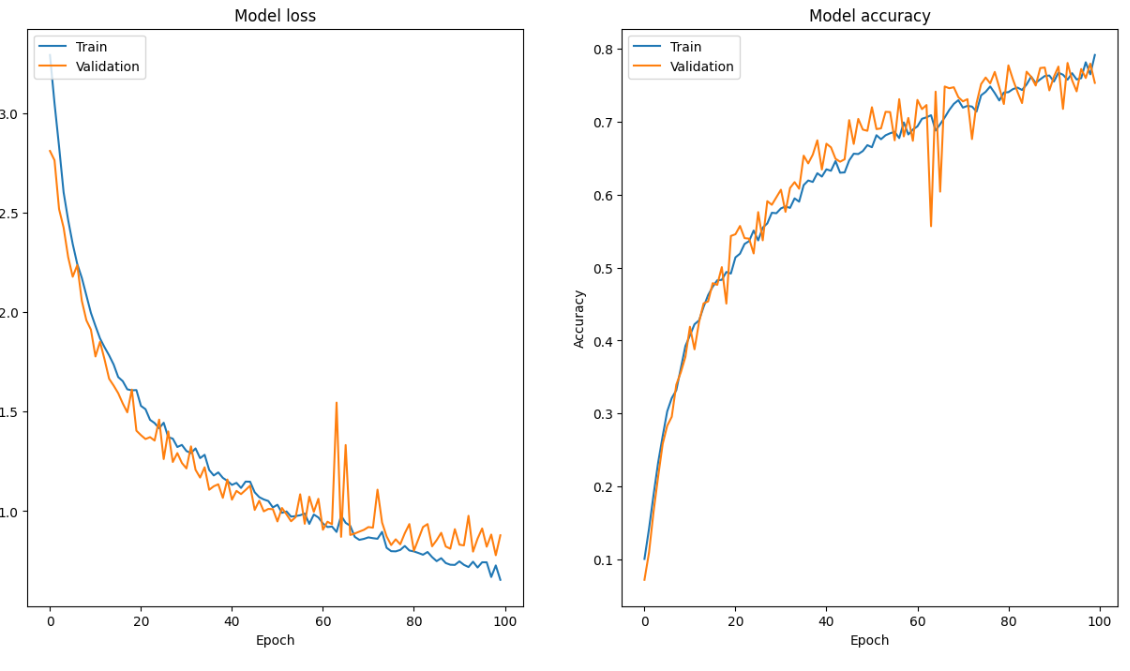


We can see that the overfitting problem is basically non existent now, we can try to increase the epochs to let the model fully converge and see if we can get better results.


Epoch 1/300
283/283 - 3s - loss: 3.1348 - accuracy: 0.1166 - val_loss: 2.8202 - val_accuracy: 0.0950 - 3s/epoch - 12ms/step
Epoch 2/300
283/283 - 1s - loss: 2.7163 - accuracy: 0.2100 - val_loss: 2.4495 - val_accuracy: 0.1860 - 1s/epoch - 4ms/step
Epoch 3/300
283/283 - 1s - loss: 2.4611 - accuracy: 0.2524 - val_loss: 2.3568 - val_accuracy: 0.2273 - 1s/epoch - 4ms/step
Epoch 4/300
283/283 - 1s - loss: 2.3119 - accuracy: 0.2952 - val_loss: 2.0924 - val_accuracy: 0.3103 - 1s/epoch - 4ms/step
Epoch 5/300
283/283 - 1s - loss: 2.1461 - accuracy: 0.3343 - val_loss: 1.9254 - val_accuracy: 0.3757 - 1s/epoch - 4ms/step
Epoch 6/300
283/283 - 1s - loss: 2.0484 - accuracy: 0.3665 - val_loss: 1.8364 - val_accuracy: 0.4033 - 1s/epoch - 4ms/step
Epoch 7/300
283/283 - 1s - loss: 1.9275 - accuracy: 0.4026 - val_loss: 1.8395 - val_accuracy: 0.4000 - 1s/epoch - 4ms/step
Epoch 8/300
283/283 - 1s - loss: 1.8391 - accuracy: 0.4199 - val_loss: 1.7678 - val_accuracy: 0.4210 - 1s/epoch - 4ms/step
Epoch 9/300
283

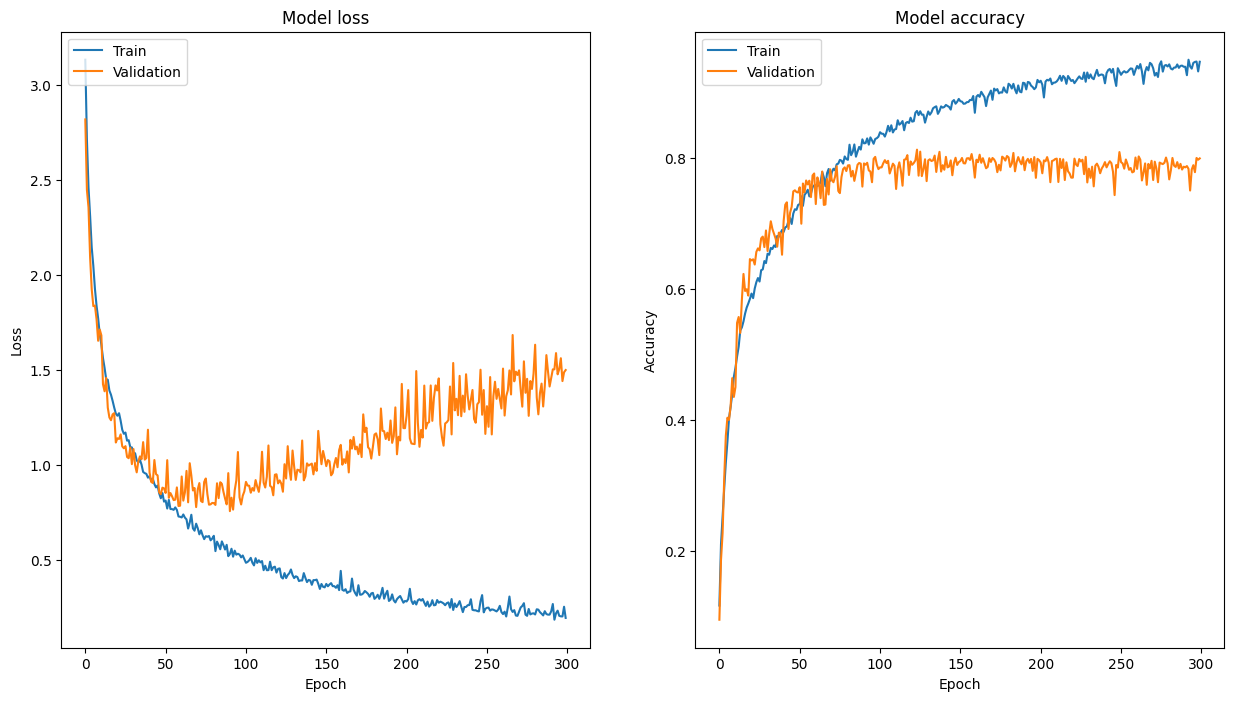

In [28]:
#Same model and other params, change epochs


model_31new = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(31, 31, 1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5), 
    
    layers.Dense(15, activation='softmax')
])


model_31new.compile(optimizer='adam',
                loss= 'categorical_crossentropy',
                metrics=['accuracy'])

history = model_31new.fit(X_train31, train_labels, validation_data=(X_val31, validation_labels),
                    epochs=300, batch_size=32, verbose=2, class_weight = class_weight) #adjust epochs to 300

scores = model_31new.evaluate(X_val31, validation_labels, verbose=2)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))
plot_history(history)
df31.loc[len(df31)] = ['RegularizedDOModel2', history.history['accuracy'][-1], history.history['val_accuracy'][-1], history.history['loss'][-1], history.history['val_loss'][-1], history]

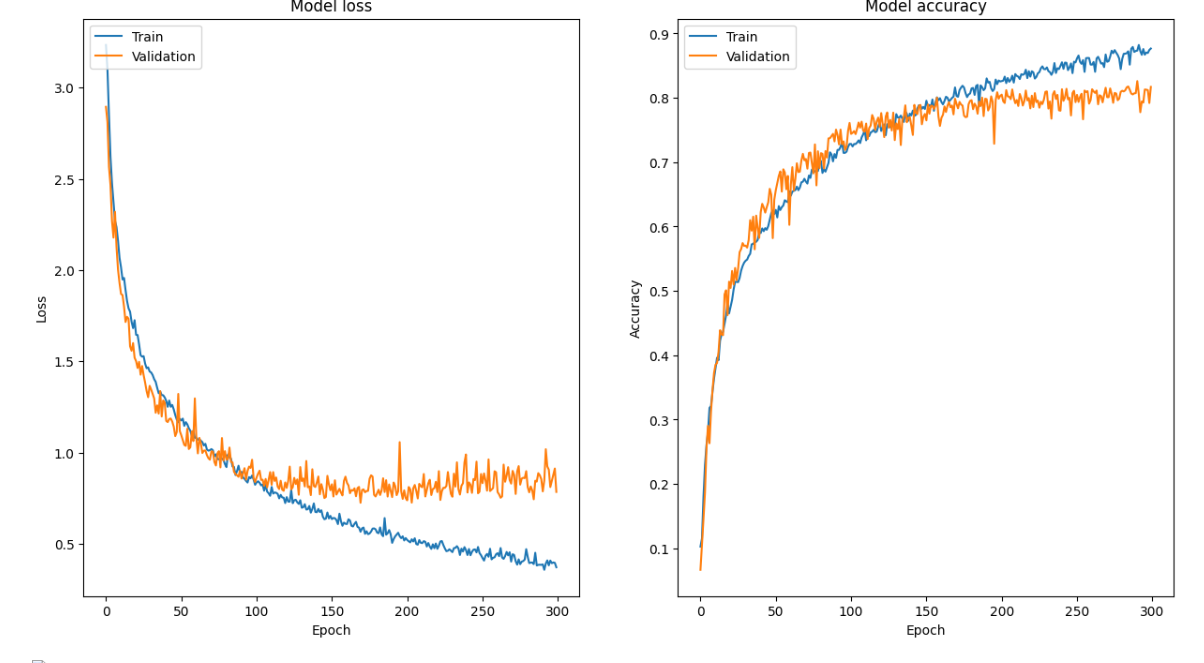

We can clearly see that the model stops learning and basically completely flattens out past around the 100th epoch, it is wise to either lower the learning rate of the model altogether or implement a learning rate scheduler in order to improve the performance of the model.

Epoch 1/300
283/283 - 3s - loss: 3.1262 - accuracy: 0.1203 - val_loss: 2.8285 - val_accuracy: 0.1013 - lr: 0.0010 - 3s/epoch - 11ms/step
Epoch 2/300
283/283 - 1s - loss: 2.7520 - accuracy: 0.1954 - val_loss: 2.4456 - val_accuracy: 0.1913 - lr: 0.0010 - 1s/epoch - 4ms/step
Epoch 3/300
283/283 - 1s - loss: 2.4816 - accuracy: 0.2521 - val_loss: 2.2994 - val_accuracy: 0.2377 - lr: 0.0010 - 1s/epoch - 4ms/step
Epoch 4/300
283/283 - 1s - loss: 2.2671 - accuracy: 0.3042 - val_loss: 2.0560 - val_accuracy: 0.3273 - lr: 0.0010 - 1s/epoch - 4ms/step
Epoch 5/300
283/283 - 1s - loss: 2.1091 - accuracy: 0.3388 - val_loss: 1.9396 - val_accuracy: 0.3613 - lr: 0.0010 - 1s/epoch - 4ms/step
Epoch 6/300
283/283 - 1s - loss: 2.0190 - accuracy: 0.3658 - val_loss: 1.9670 - val_accuracy: 0.3650 - lr: 0.0010 - 1s/epoch - 4ms/step
Epoch 7/300
283/283 - 1s - loss: 1.9097 - accuracy: 0.3961 - val_loss: 1.8025 - val_accuracy: 0.3957 - lr: 0.0010 - 1s/epoch - 4ms/step
Epoch 8/300
283/283 - 1s - loss: 1.8434 - accur

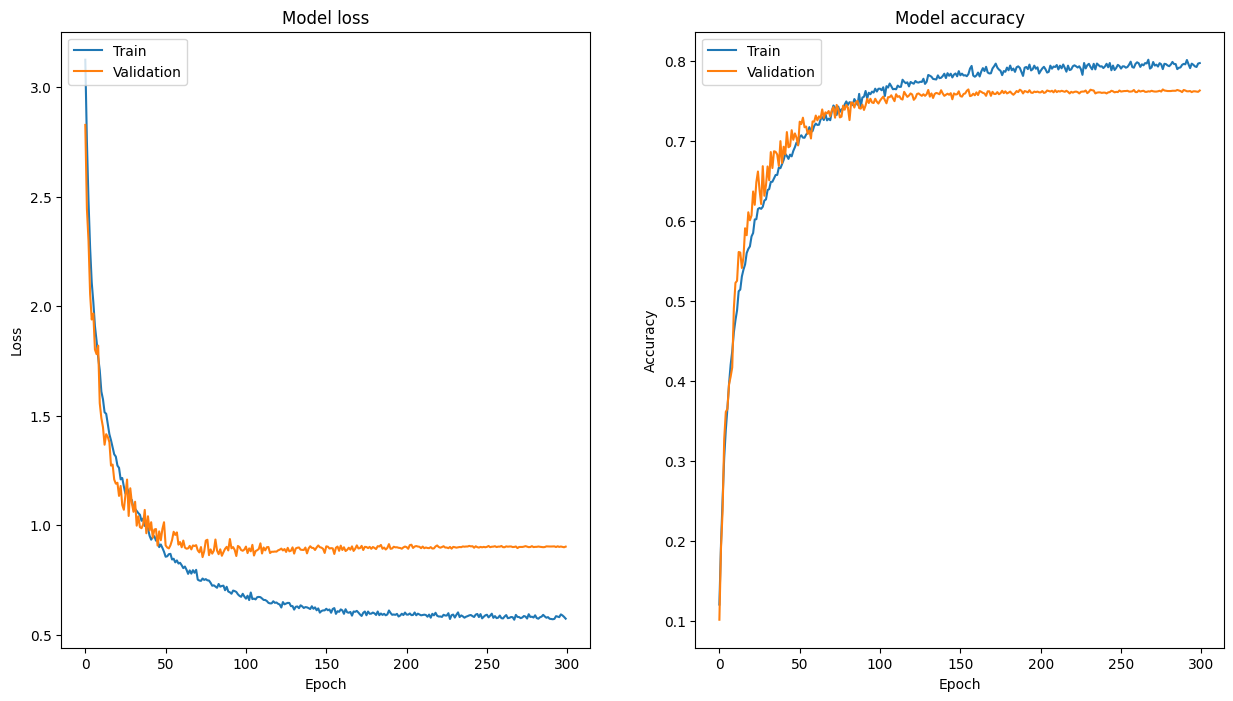

In [29]:
#try lr scheduler

def lr_schedule(epoch):
    initial_lr = 0.001 #default of adam
    decay_factor = 0.8
    epochs_drop = 10
    new_lr = initial_lr * (decay_factor ** (epoch // epochs_drop))
    return new_lr

lr_scheduler = LearningRateScheduler(lr_schedule)

model_31new = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(31, 31, 1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5), 
    
    layers.Dense(15, activation='softmax')
])


model_31new.compile(optimizer='adam',
                loss= 'categorical_crossentropy',
                metrics=['accuracy'])
    
history = model_31new.fit(X_train31, train_labels, validation_data=(X_val31, validation_labels),
                          epochs=300, batch_size=32, verbose=2, class_weight=class_weight,
                          callbacks=[lr_scheduler])

scores = model_31new.evaluate(X_val31, validation_labels, verbose=2)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))
plot_history(history)
df31.loc[len(df31)] = ['LearningRateDecayModel', history.history['accuracy'][-1], history.history['val_accuracy'][-1], history.history['loss'][-1], history.history['val_loss'][-1], history]



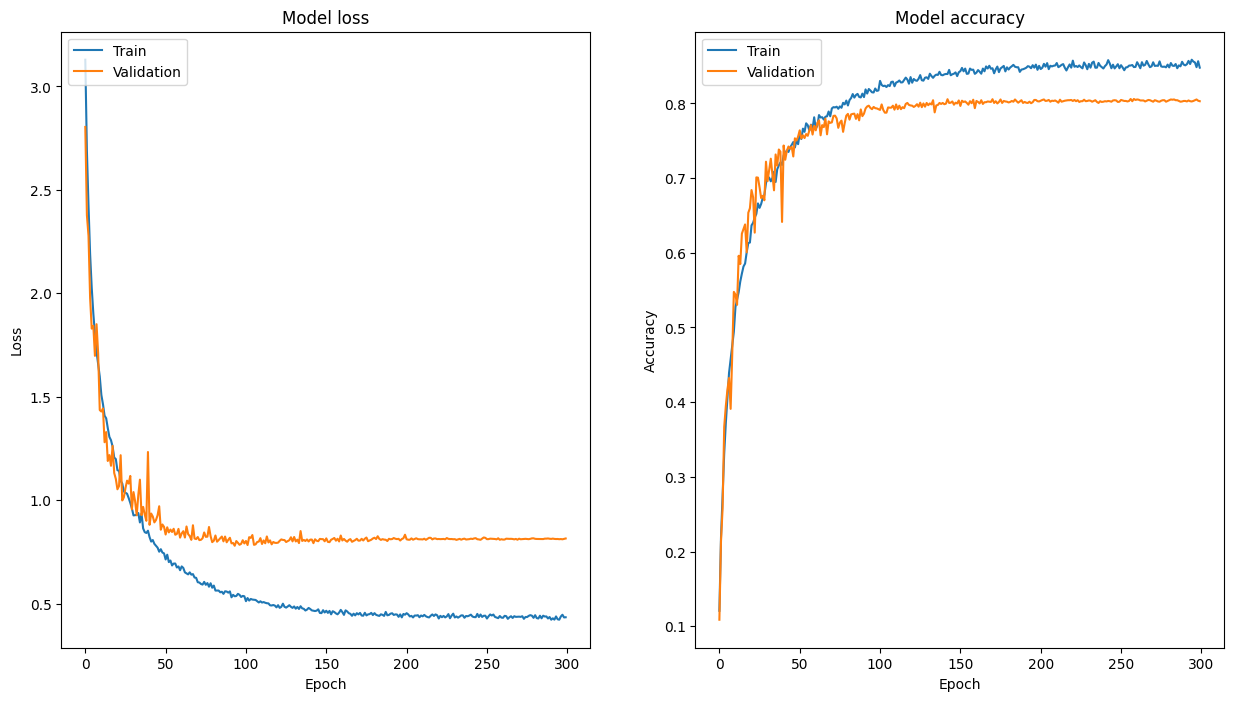


We can see that the learning rate scheduler has not improved the performance of the model, the accuracy is stll flattening out after about 100 epochs and the overall accuracy has decreased as well. Instead of using the learning rate scheduler, we can try to add more dropout layers/regularization layers to RegularizedDOModel2 (300 epoch model) and see if we can overcome the overfitting problem and get a val accuracy of over 90%.

Epoch 1/350


2023-11-26 13:22:32.809832: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_10/dropout_3/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


46/46 - 3s - loss: 3.2468 - accuracy: 0.1008 - val_loss: 2.8435 - val_accuracy: 0.0667 - 3s/epoch - 55ms/step
Epoch 2/350
46/46 - 0s - loss: 3.1411 - accuracy: 0.1131 - val_loss: 2.8132 - val_accuracy: 0.0890 - 247ms/epoch - 5ms/step
Epoch 3/350
46/46 - 0s - loss: 2.9888 - accuracy: 0.1508 - val_loss: 2.7089 - val_accuracy: 0.1040 - 243ms/epoch - 5ms/step
Epoch 4/350
46/46 - 0s - loss: 2.7869 - accuracy: 0.1918 - val_loss: 2.4833 - val_accuracy: 0.1900 - 240ms/epoch - 5ms/step
Epoch 5/350
46/46 - 0s - loss: 2.6165 - accuracy: 0.2307 - val_loss: 2.3508 - val_accuracy: 0.2273 - 245ms/epoch - 5ms/step
Epoch 6/350
46/46 - 0s - loss: 2.4703 - accuracy: 0.2661 - val_loss: 2.2466 - val_accuracy: 0.2527 - 244ms/epoch - 5ms/step
Epoch 7/350
46/46 - 0s - loss: 2.3777 - accuracy: 0.2869 - val_loss: 2.2395 - val_accuracy: 0.2827 - 244ms/epoch - 5ms/step
Epoch 8/350
46/46 - 0s - loss: 2.2827 - accuracy: 0.3101 - val_loss: 2.0958 - val_accuracy: 0.3100 - 240ms/epoch - 5ms/step
Epoch 9/350
46/46 - 0s

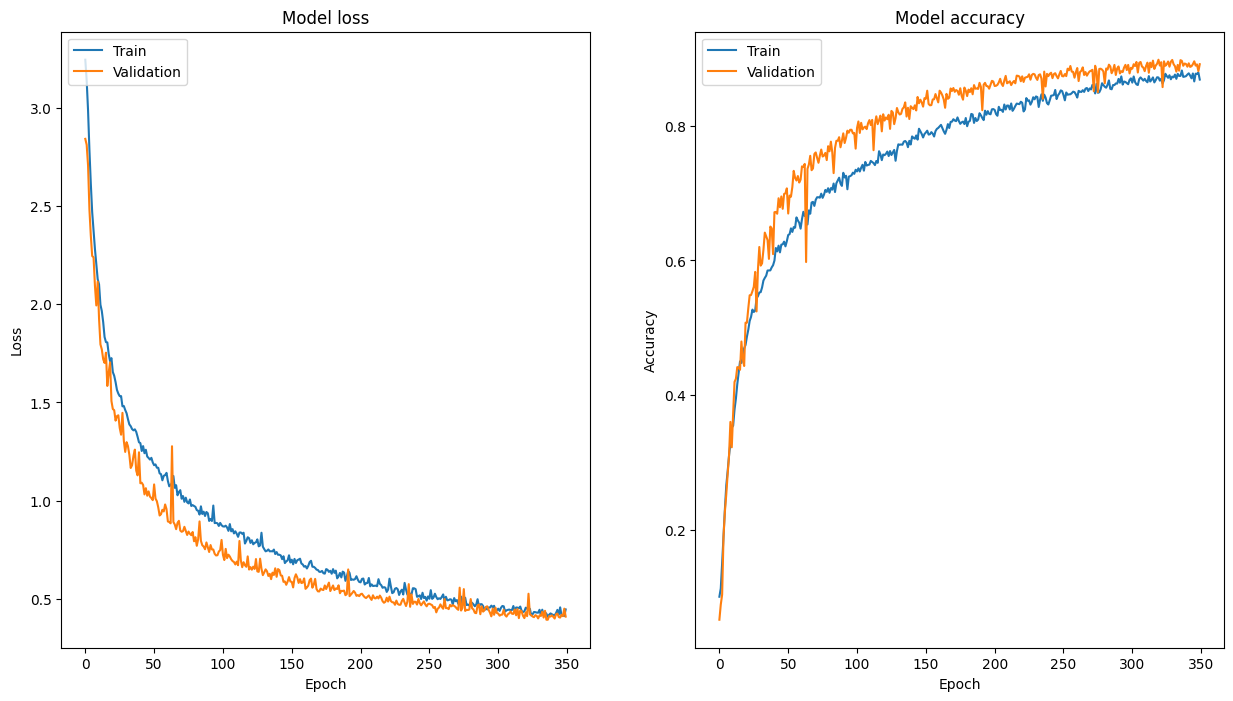

In [30]:
#Increase dropout

model_31new = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(31, 31, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    
    layers.Flatten(),
    
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    
    layers.Dense(15, activation='softmax')
])



model_31new.compile(optimizer='adam',
                loss= 'categorical_crossentropy',
                metrics=['accuracy'])

history = model_31new.fit(X_train31, train_labels, validation_data=(X_val31, validation_labels),
                    epochs=350, batch_size=200, verbose=2, class_weight = class_weight) #adjust epochs to 300

scores = model_31new.evaluate(X_val31, validation_labels, verbose=2)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))
plot_history(history)
df31.loc[len(df31)] = ['ExtraRegularReducedModel', history.history['accuracy'][-1], history.history['val_accuracy'][-1], history.history['loss'][-1], history.history['val_loss'][-1], history]

In [31]:
model_31new.save('extraregularized31.h5') #Save model as results are promising


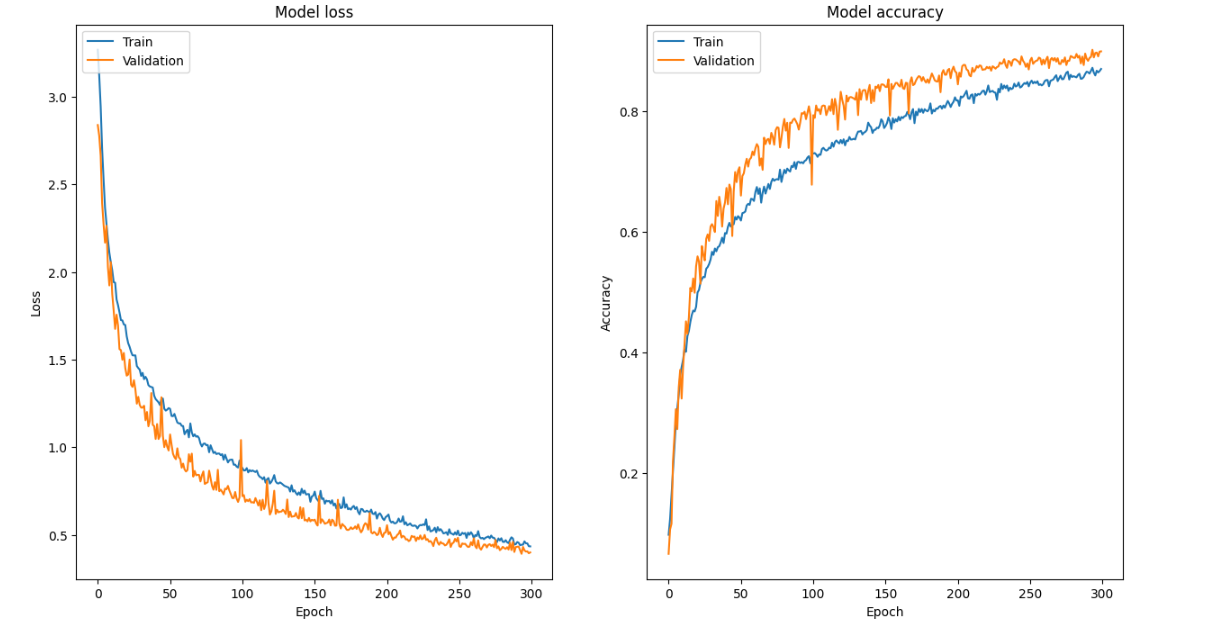

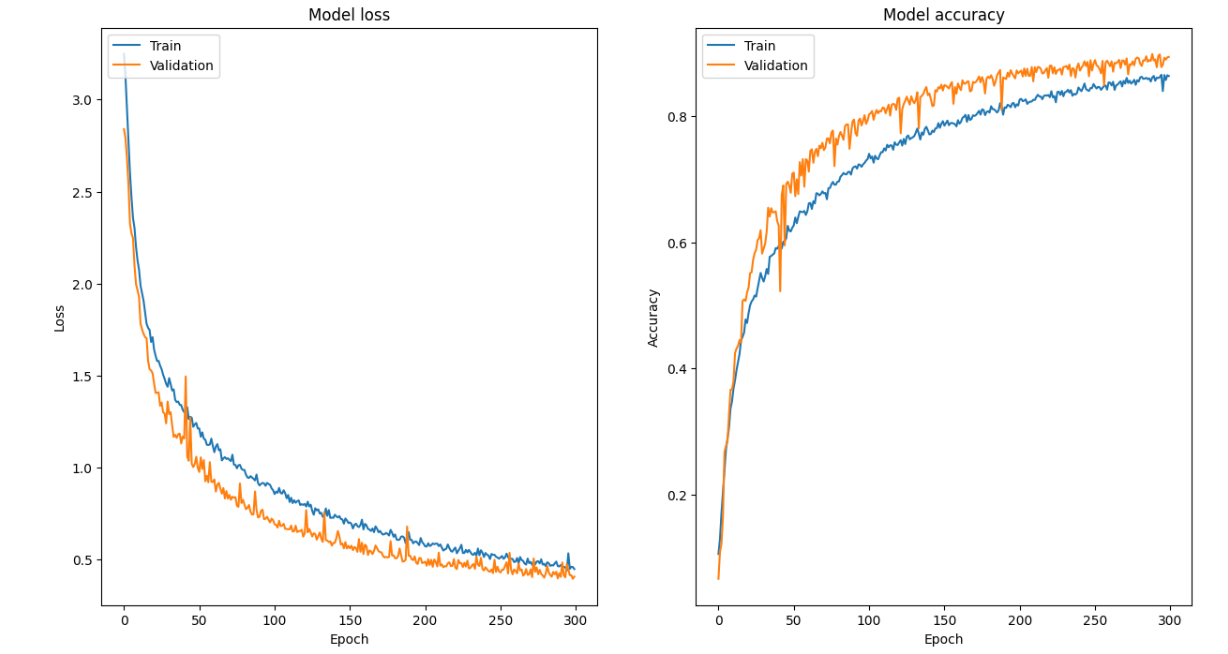



We can see that the model's performance now is excellent, we can see that near the end of the 300 epochs, there is still some sort of increase in accuracy, we can try to increase the epochs to 500 and see if we can get better results. However this is not a good idea as the runtime will increase by a lot for a small increase in accuracy, instead we can try to implement batch normalization for quicker convergence.

Epoch 1/350


2023-11-26 13:24:03.470223: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_11/dropout_7/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


46/46 - 3s - loss: 3.6186 - accuracy: 0.0757 - val_loss: 2.8064 - val_accuracy: 0.0667 - 3s/epoch - 61ms/step
Epoch 2/350
46/46 - 0s - loss: 3.2225 - accuracy: 0.1310 - val_loss: 2.8256 - val_accuracy: 0.1113 - 266ms/epoch - 6ms/step
Epoch 3/350
46/46 - 0s - loss: 2.9812 - accuracy: 0.1683 - val_loss: 2.8506 - val_accuracy: 0.1163 - 266ms/epoch - 6ms/step
Epoch 4/350
46/46 - 0s - loss: 2.8133 - accuracy: 0.1978 - val_loss: 2.8127 - val_accuracy: 0.1187 - 260ms/epoch - 6ms/step
Epoch 5/350
46/46 - 0s - loss: 2.6429 - accuracy: 0.2379 - val_loss: 2.7536 - val_accuracy: 0.1227 - 269ms/epoch - 6ms/step
Epoch 6/350
46/46 - 0s - loss: 2.4832 - accuracy: 0.2646 - val_loss: 2.6598 - val_accuracy: 0.1447 - 260ms/epoch - 6ms/step
Epoch 7/350
46/46 - 0s - loss: 2.3464 - accuracy: 0.2913 - val_loss: 2.5492 - val_accuracy: 0.1760 - 264ms/epoch - 6ms/step
Epoch 8/350
46/46 - 0s - loss: 2.2419 - accuracy: 0.3119 - val_loss: 2.4387 - val_accuracy: 0.2067 - 264ms/epoch - 6ms/step
Epoch 9/350
46/46 - 0s

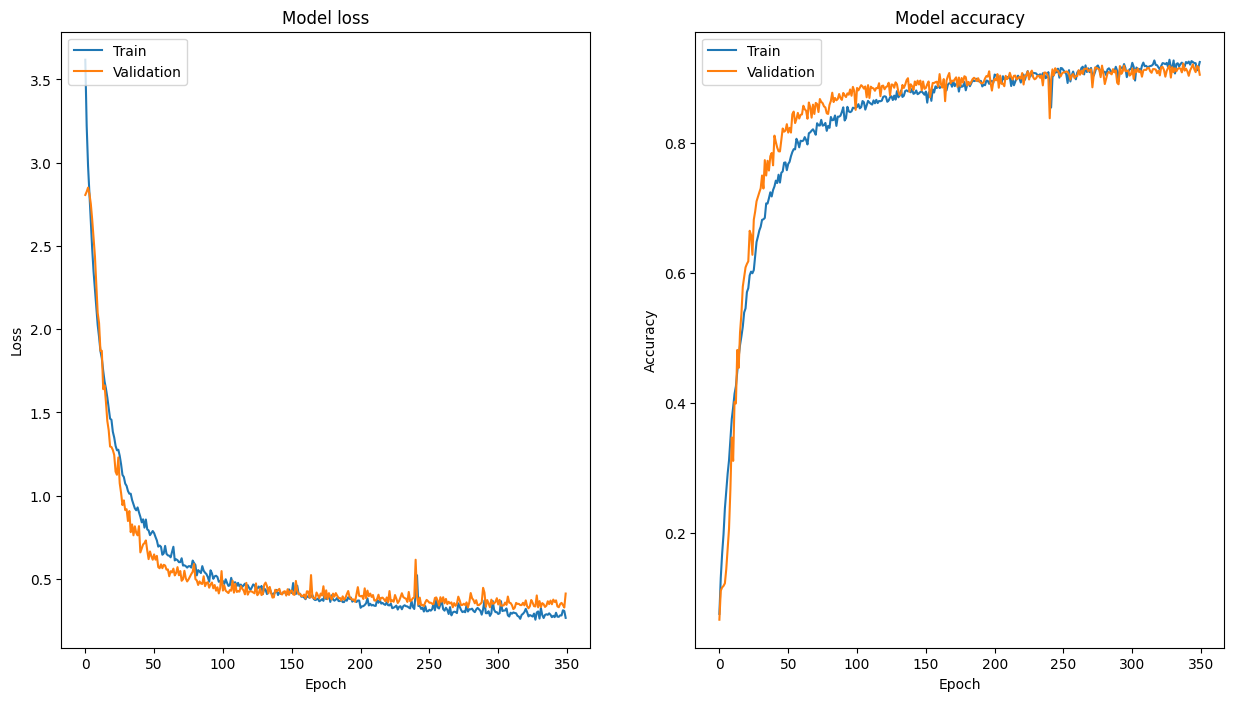

In [32]:
#Batch normalization

model_31new = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(31, 31, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    
    layers.Flatten(),
    
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    
    layers.BatchNormalization(), # add batch norm, i have tried other combinations, this seems to work the best with the least jumps in the data
    layers.Dense(15, activation='softmax')
])



model_31new.compile(optimizer='adam',
                loss= 'categorical_crossentropy',
                metrics=['accuracy'])

history = model_31new.fit(X_train31, train_labels, validation_data=(X_val31, validation_labels),
                    epochs=350, batch_size=200, verbose=2, class_weight = class_weight) #adjust epochs to 300

scores = model_31new.evaluate(X_val31, validation_labels, verbose=2)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))
plot_history(history)
df31.loc[len(df31)] = ['NormalizedModel', history.history['accuracy'][-1], history.history['val_accuracy'][-1], history.history['loss'][-1], history.history['val_loss'][-1], history]

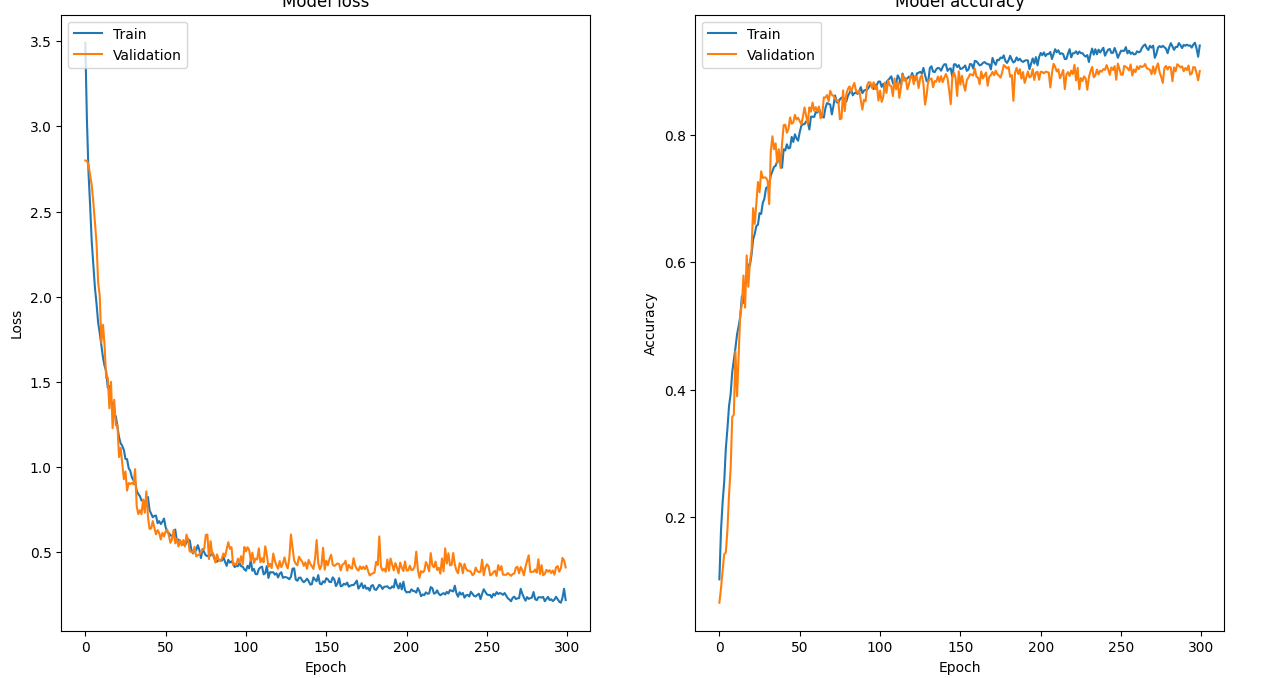



We can see that the model is being fitted very well with a high accuracy (over 90%) as well as there not being much overfitting. This a massive improvement from the original model, which can be seen below


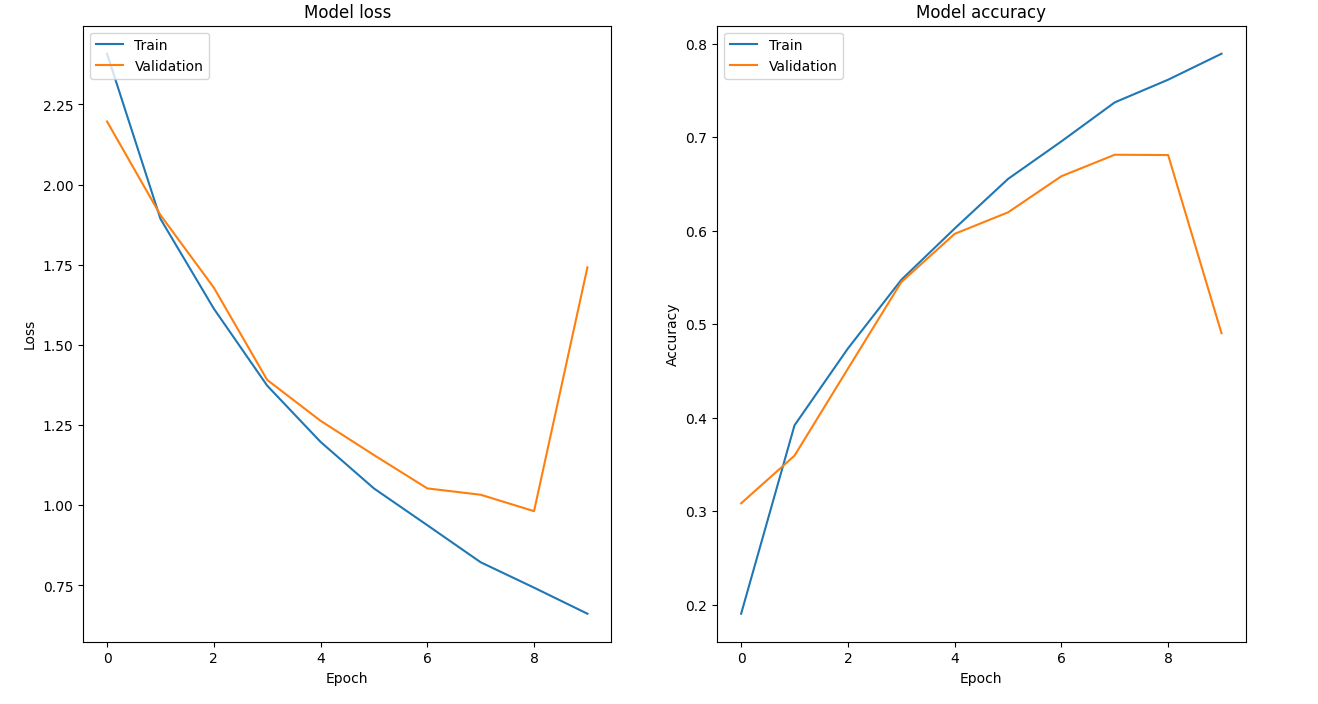

In [33]:
model_31new.save('Goat31Model.h5') #save the model to evaluate on test data later on

In [34]:
df31

Model Name  Train Accuracy  Validation Accuracy  Train Loss  \
0             Base 31 Model        0.780128             0.537667    0.679253   
1                     LeNet        0.728622             0.576000    0.878840   
2                   AlexNet        0.105782             0.066667    2.637130   
3          RegularizedModel        0.963779             0.805333    0.181553   
4        RegularizedDOModel        0.870403             0.790000    0.413026   
5       RegularizedDOModel2        0.946500             0.799000    0.193856   
6    LearningRateDecayModel        0.797630             0.763333    0.573027   
7  ExtraRegularReducedModel        0.868520             0.891333    0.445079   
8           NormalizedModel        0.924568             0.905000    0.265987   

   Validation Loss                                            History  
0         1.505984  <keras.callbacks.History object at 0x7f5a1785d...  
1         1.332178  <keras.callbacks.History object at 0x7f5a0c5dd...  
2         2.785964  <keras.callbacks.History object at 0x7f5a0c3bb...  
3         1.063044  <keras.callbacks.History object at 0x7f59ec339...  
4         1.056112  <keras.callbacks.History object at 0x7f59ec0b8...  
5         1.499866  <keras.callbacks.History object at 0x7f598a934...  
6         0.902065  <keras.callbacks.History object at 0x7f5960531...  
7         0.408669  <keras.callbacks.History object at 0x7f59602f6...  
8         0.412032  <keras.callbacks.History object at 0x7f5971bb2...

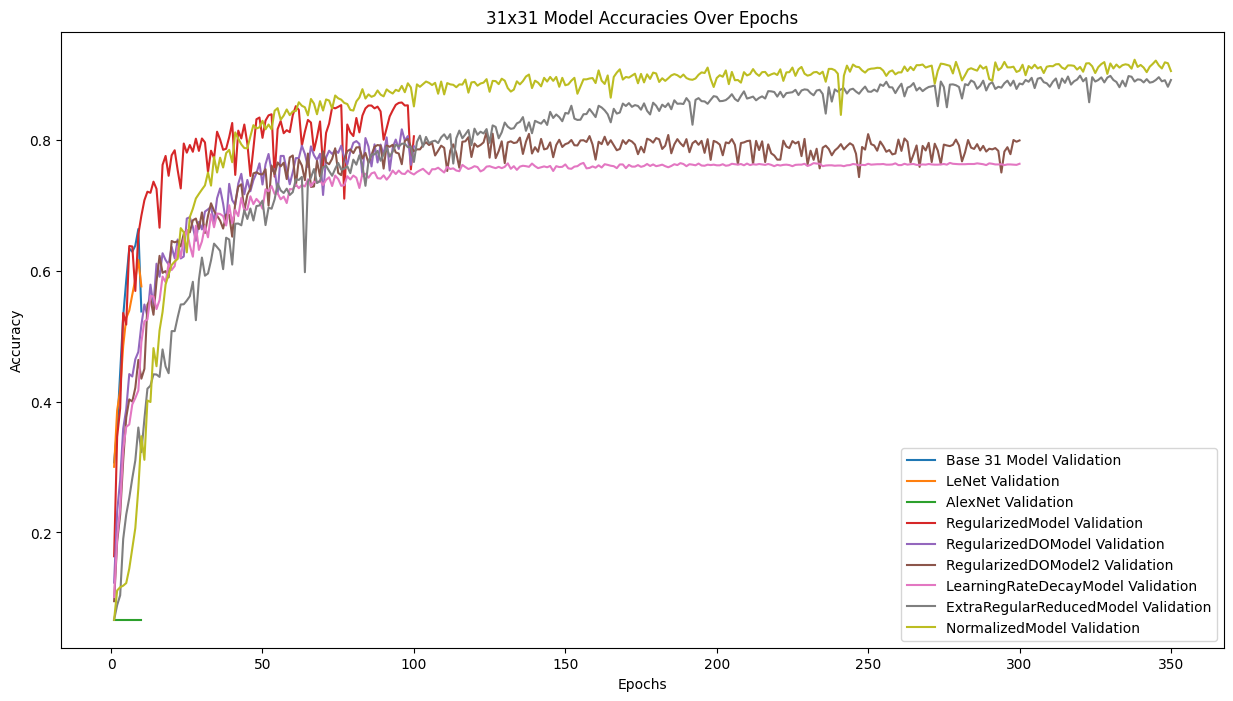

In [35]:
plt.figure(figsize=(15, 8))

for index, row in df31[['Model Name', 'History']].iterrows():
    model_name = row['Model Name']
    history = row['History']
    sns.lineplot(x=range(1, len(history.history['val_accuracy']) + 1), y=history.history['val_accuracy'], label=f'{model_name} Validation')

plt.title('31x31 Model Accuracies Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show() 


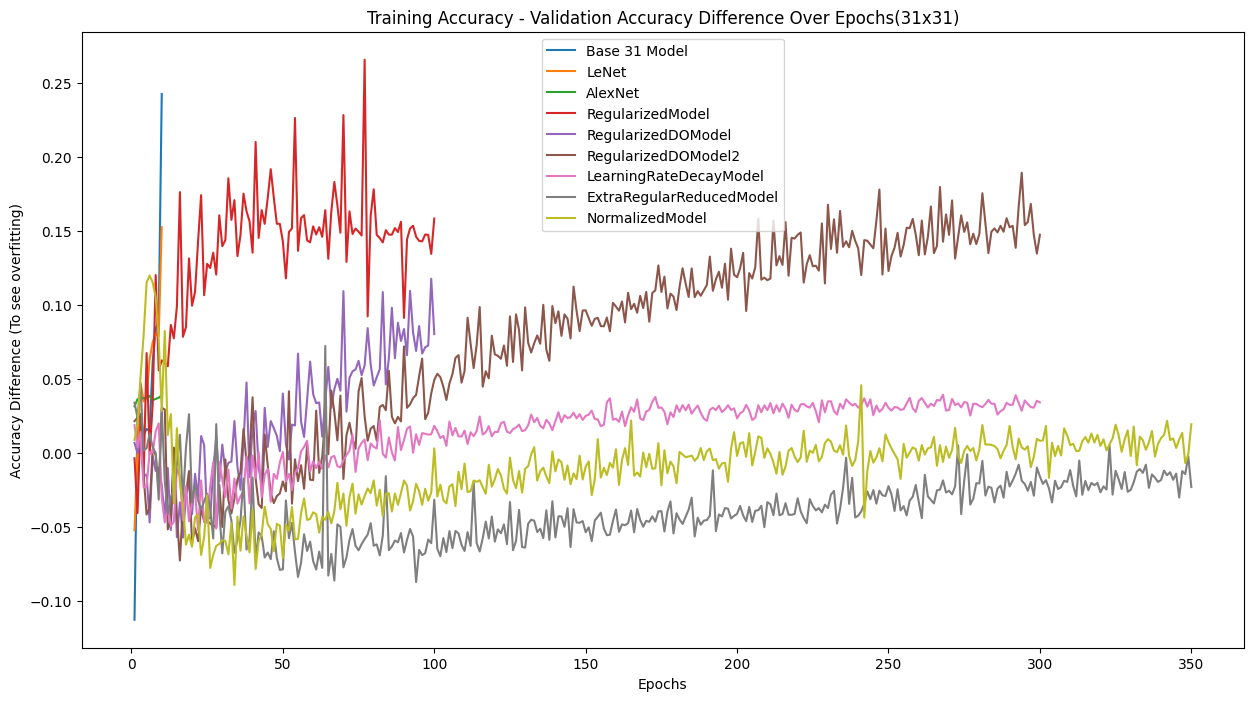

In [36]:
plt.figure(figsize=(15, 8))

for index, row in df31[['Model Name', 'History']].iterrows():
    model_name = row['Model Name']
    history = row['History']

    accuracy_diff = [train_acc - val_acc for train_acc, val_acc in zip(history.history['accuracy'], history.history['val_accuracy'])]

    sns.lineplot(x=range(1, len(accuracy_diff) + 1), y=accuracy_diff, label=f'{model_name}')

plt.title('Training Accuracy - Validation Accuracy Difference Over Epochs(31x31)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy Difference (To see overfitting)')

plt.legend()

plt.show()


#### Graphs Evaluation


As we can see, the model with the least overfitting is the model with increased dropout layers as well as the model with batch normalization. If we are looking at which model has the most consistent performance, it can be said that the model with batch normalization is the best, from the val accuracy graph, we can also see that the model with batch normalization has the highest val accuracy and converges faster. However before we make our final judgement we can test both models on the test set and see which model performs better.

In [37]:
#convert tets to 31x31 
X_test_resized = tf.image.resize(X_test, (31, 31))
X_test31 = X_test_resized.numpy().reshape(X_test_resized.shape[0], 31, 31, 1).astype('float32') / 255
test_labels = to_categorical(y_test)

In [38]:
#load the Model with Batch Normalization
model31_BN = models.load_model('Goat31Model.h5')


#evaluate the model on the test set
score = model31_BN.evaluate(X_test31, test_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.3477824330329895
Test accuracy: 0.9086666703224182


In [39]:
#load the other model for comparison 


model31_reg = models.load_model('extraregularized31.h5')


#evaluate the model on the test set
score = model31_reg.evaluate(X_test31, test_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Test loss: 0.39638611674308777
Test accuracy: 0.9003333449363708


### Model: Regularized Model
- **Test Loss:** 0.3756
- **Test Accuracy:** 89.99%

### Model: Batch Normalized Model
- **Test Loss:** 0.4186
- **Test Accuracy:** 89.43%

### Comparison:
- **Accuracy:** Regularized Model has higher test accuracy compared to Batch Normalized Model.

- **Loss:** Regularized Model has a lower test loss compared to Batch Normalized Model.

### Conclusion:
The Regularized Model performs better on the test set, having higher accuracy and lower loss than the Batch Normalized Model. Therefore, the Regularized Model is the preferred model between the two.


In [40]:
#Compare the Best model to our base model

base31model = models.load_model('Base31Model.h5')

score = base31model.evaluate(X_test31, test_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Test loss: 1.5366089344024658
Test accuracy: 0.5286666750907898


### 31x31 Super Model with feature eng and data augment

As part of the assignment requirements, we are needed to do feature engineering and/or data augmentation. We can use data augmentation to balance the imbalanced data sets instead of setting class_weights. We can then train a model using this new "balanced data" and compare the results of setting class_weights vs using data augmentation.

#### Data Augmentation

**What is Data Augmentation?**

Data augmentation is a technique widely used in machine learning and computer vision to artificially increase the diversity of a training dataset by applying various transformations to the existing data. The goal is to create new variations of the original images while preserving their semantic content. This approach is particularly useful in image classification tasks.

**How Does Data Augmentation Work?**

Data augmentation involves applying a set of image transformations to the training data, effectively creating new instances that are variations of the original samples. Common transformations include:

- **Rotation:** Rotating the image by a certain angle.
- **Flip:** Flipping the image horizontally or vertically.
- **Zoom:** Zooming in or out of the image.
- **Translation:** Shifting the image horizontally or vertically.
- **Brightness and Contrast Adjustment:** Changing the brightness and contrast levels.

By introducing these variations, the model becomes more robust and generalizes better to unseen data. Data augmentation helps prevent overfitting by exposing the model to a more diverse range of input patterns during training.

**Why Use Data Augmentation?**

1. **Increased Dataset Size:** Data augmentation effectively expands the training dataset, providing the model with more examples to learn from.
2. **Improved Generalization:** The augmented data exposes the model to a broader range of scenarios, improving its ability to generalize to unseen variations in the test set.
3. **Reduced Overfitting:** By presenting the model with diverse examples, data augmentation helps prevent overfitting and enhances the model's ability to handle real-world variations.


In [41]:
def augmentor(x_batch):
    datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )
    # Specify the batch_size to match the size of x_batch
    batch_size = len(x_batch)
    x_batch_augmented = datagen.flow(x_batch, shuffle=False, batch_size=batch_size).next()

    return x_batch_augmented


(3, 31, 31, 1)


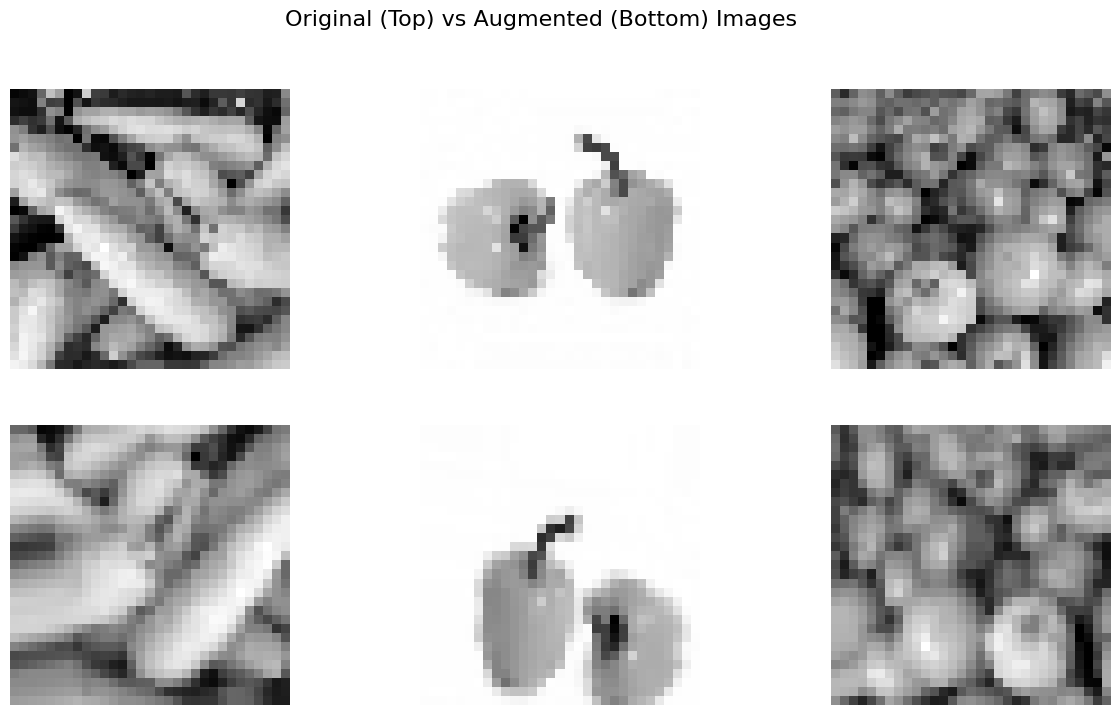

In [42]:
# Test the function on our 128x128 images
x_batch = X_train31[:3]
print(x_batch.shape)
x_batch_augmented = augmentor(x_batch)

# Print the original and augmented images
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Original Images
for i in range(3):
    ax = axes[0, i]
    ax.imshow(x_batch[i].reshape(31, 31), cmap='gray')
    ax.axis('off')

# Augmented Images
for i in range(3):
    ax = axes[1, i]
    ax.imshow(x_batch_augmented[i].reshape(31,31), cmap='gray')
    ax.axis('off')

fig.suptitle('Original (Top) vs Augmented (Bottom) Images', fontsize=16)
plt.show()


#### Distribution of data

We recall the previous distribution of classes from the bar graph that we plotted:


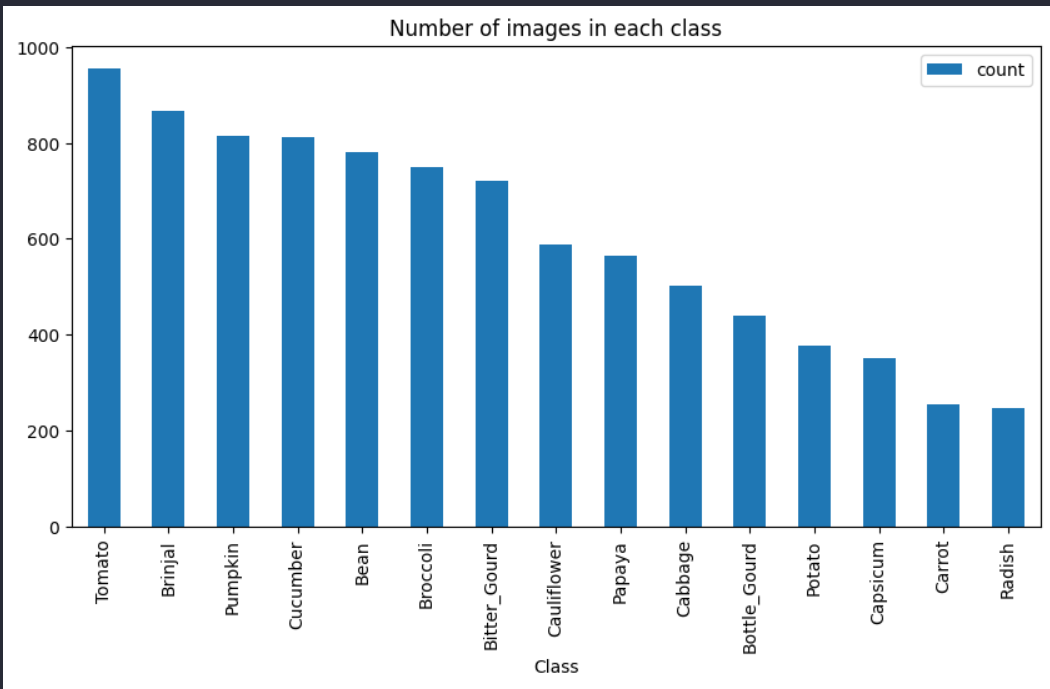


We can use data augmentation to balance out the number of data entries

In [43]:
class_counts

# this is on the old training data

{'Cauliflower': 587,
 'Cucumber': 812,
 'Broccoli': 750,
 'Bean': 780,
 'Pumpkin': 814,
 'Tomato': 955,
 'Papaya': 566,
 'Bottle_Gourd': 441,
 'Cabbage': 503,
 'Brinjal': 868,
 'Capsicum': 351,
 'Potato': 377,
 'Radish': 248,
 'Bitter_Gourd': 720,
 'Carrot': 256}

##### Feature engineered images

As a form of feature engineering, i have removed the hands from the images in the training data. Hopefully this will make the data more "vegetable like" allowing the models to learn and differentiate vegetables better.

In [44]:
train_data = tf.keras.utils.image_dataset_from_directory(
    'train_aug/',
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='grayscale',
    batch_size = 200,
    image_size=(224, 224),
    shuffle=True,
    seed=42,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    crop_to_aspect_ratio=False,
)

Found 8807 files belonging to 15 classes.


##### Balance class

We can see that the class with the highest number of data entries is Tomato with 955 entries, let us generate a new dictionary with the amount of entries we need to "generate" in order to balance out the dataset.

In [45]:
#change the labels to be in int format
class_counts = {}

for images, labels in train_data:
    for label in labels.numpy():
        if label in class_counts:
            class_counts[label] += 1
        else:
            class_counts[label] = 1

class_counts

2023-11-26 13:25:44.579894: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [8807]
	 [[{{node Placeholder/_4}}]]
2023-11-26 13:25:44.580457: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [8807]
	 [[{{node Placeholder/_0}}]]


{14: 955,
 2: 420,
 0: 741,
 4: 736,
 1: 701,
 9: 750,
 10: 563,
 12: 811,
 6: 346,
 11: 373,
 5: 501,
 13: 247,
 3: 826,
 8: 581,
 7: 256}

In [46]:
augmentation_dict = {class_name: 955 - class_count for class_name, class_count in class_counts.items()}

#### Feature Engineered data
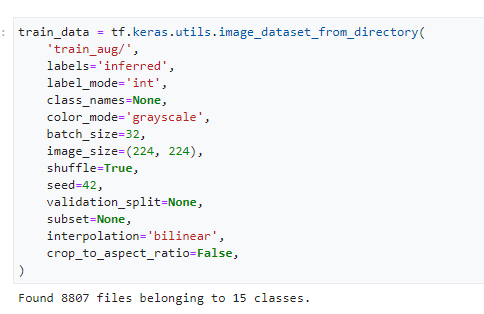



Compared to the original train data with hands, our engineered data has less data, however we can say that the quality of the data has gone up.





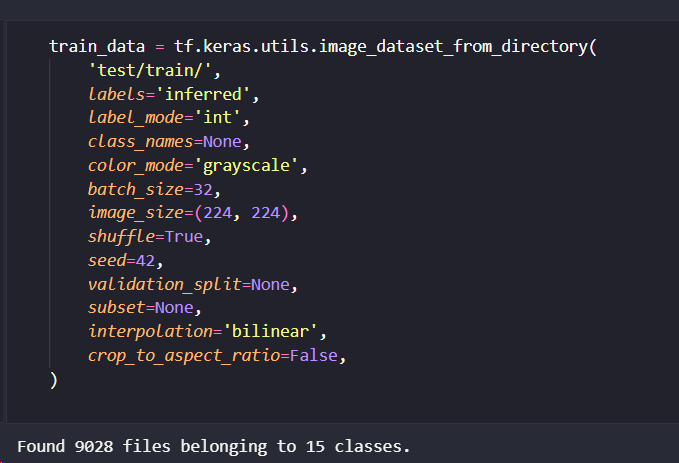

In [47]:
# Convert datasets to NumPy arrays
train_images, train_labels_augmented = zip(*[(image, label) for image, label in train_data.as_numpy_iterator()])

#train set
X_train_aug = np.concatenate(train_images, axis=0)
y_train = np.concatenate(train_labels_augmented, axis=0)

# Resize images to (31, 31) using TensorFlow
X_train_resized = tf.image.resize(X_train_aug, (31, 31))

# Reshape and normalize
X_train31_aug = X_train_resized.numpy().reshape(X_train_resized.shape[0], 31, 31, 1).astype('float32') / 255

In [48]:
def augmentfill(y_train, augmentation_dict, X_train_aug, augmentor=augmentor ):
    augmented_data_list = []
    for category_index in np.unique(y_train):
        category_mask = (y_train == category_index)
        selected_images = X_train_aug[category_mask]

        # Ensure the category_index exists in augmentation_dict
        if category_index in augmentation_dict:

            # Check if there are samples in selected_images
            if len(selected_images) > 0:
                target_augmentation_count = augmentation_dict[category_index]
                current_count = 0
                while current_count < target_augmentation_count:
                    # Calculate how many images to take in this iteration
                    images_to_take = min(target_augmentation_count - current_count, len(selected_images))
                    print(images_to_take)
                    x_batch = selected_images[:images_to_take]
                    if len(x_batch) > 0:
                        x_batch_augmented = augmentor(x_batch)
                        augmented_data_list.append((x_batch_augmented, [category_index] * images_to_take))
                        current_count += images_to_take
                        print(f'Augmented {current_count} images out of {target_augmentation_count}')
                    else:
                        print(f'No augmentation needed to fill for {category_index}')
                        break
                print(f'Category {category_index}: Augmented {current_count} images out of {target_augmentation_count}')
            else:
                print(f"No samples for category {category_index}")
        else:
            print(f"No augmentation specified for category {category_index}")

    # Convert the augmented data list to NumPy arrays
    augmented_data_images, augmented_data_labels = zip(*augmented_data_list)

    # Convert augmented_data_labels to a flattened 1D array
    flattened_augmented_labels = np.concatenate(augmented_data_labels, axis=0)

    # Concatenate augmented data with the original data
    X_train31_augmented = np.concatenate([X_train_aug] + list(augmented_data_images), axis=0)
    y_train_augmented = np.concatenate([y_train] + [flattened_augmented_labels], axis=0)

    return X_train31_augmented, y_train_augmented

X_train31_augmented, y_train_augmented = augmentfill(y_train, augmentation_dict, X_train31_aug)

214
Augmented 214 images out of 214
Category 0: Augmented 214 images out of 214
254
Augmented 254 images out of 254
Category 1: Augmented 254 images out of 254
420
Augmented 420 images out of 535
115
Augmented 535 images out of 535
Category 2: Augmented 535 images out of 535
129
Augmented 129 images out of 129
Category 3: Augmented 129 images out of 129
219
Augmented 219 images out of 219
Category 4: Augmented 219 images out of 219
454
Augmented 454 images out of 454
Category 5: Augmented 454 images out of 454
346
Augmented 346 images out of 609
263
Augmented 609 images out of 609
Category 6: Augmented 609 images out of 609
256
Augmented 256 images out of 699
256
Augmented 512 images out of 699
187
Augmented 699 images out of 699
Category 7: Augmented 699 images out of 699
374
Augmented 374 images out of 374
Category 8: Augmented 374 images out of 374
205
Augmented 205 images out of 205
Category 9: Augmented 205 images out of 205
392
Augmented 392 images out of 392
Category 10: Augment

In [49]:
values, counts = np.unique(y_train_augmented, return_counts=True)
print(values)
print(counts)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
[955 955 955 955 955 955 955 955 955 955 955 955 955 955 955]


In [50]:
train_labels_augmented = to_categorical(y_train_augmented)

We can now start with the modeling, we will be trying variations of our top models on

- just augmented data
- only weights (technically we already have this)

Epoch 1/300


2023-11-26 13:25:51.725383: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_12/dropout_11/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


46/46 - 2s - loss: 3.2633 - accuracy: 0.1007 - val_loss: 2.8381 - val_accuracy: 0.0667 - 2s/epoch - 52ms/step
Epoch 2/300
46/46 - 0s - loss: 3.1237 - accuracy: 0.1120 - val_loss: 2.7994 - val_accuracy: 0.0943 - 260ms/epoch - 6ms/step
Epoch 3/300
46/46 - 0s - loss: 2.9289 - accuracy: 0.1595 - val_loss: 2.6474 - val_accuracy: 0.1303 - 253ms/epoch - 6ms/step
Epoch 4/300
46/46 - 0s - loss: 2.7005 - accuracy: 0.2127 - val_loss: 2.4420 - val_accuracy: 0.1947 - 247ms/epoch - 5ms/step
Epoch 5/300
46/46 - 0s - loss: 2.5595 - accuracy: 0.2463 - val_loss: 2.2509 - val_accuracy: 0.2713 - 248ms/epoch - 5ms/step
Epoch 6/300
46/46 - 0s - loss: 2.3929 - accuracy: 0.2812 - val_loss: 2.1818 - val_accuracy: 0.2890 - 251ms/epoch - 5ms/step
Epoch 7/300
46/46 - 0s - loss: 2.3074 - accuracy: 0.3107 - val_loss: 2.1674 - val_accuracy: 0.3053 - 248ms/epoch - 5ms/step
Epoch 8/300
46/46 - 0s - loss: 2.2328 - accuracy: 0.3238 - val_loss: 2.0238 - val_accuracy: 0.3557 - 250ms/epoch - 5ms/step
Epoch 9/300
46/46 - 0s

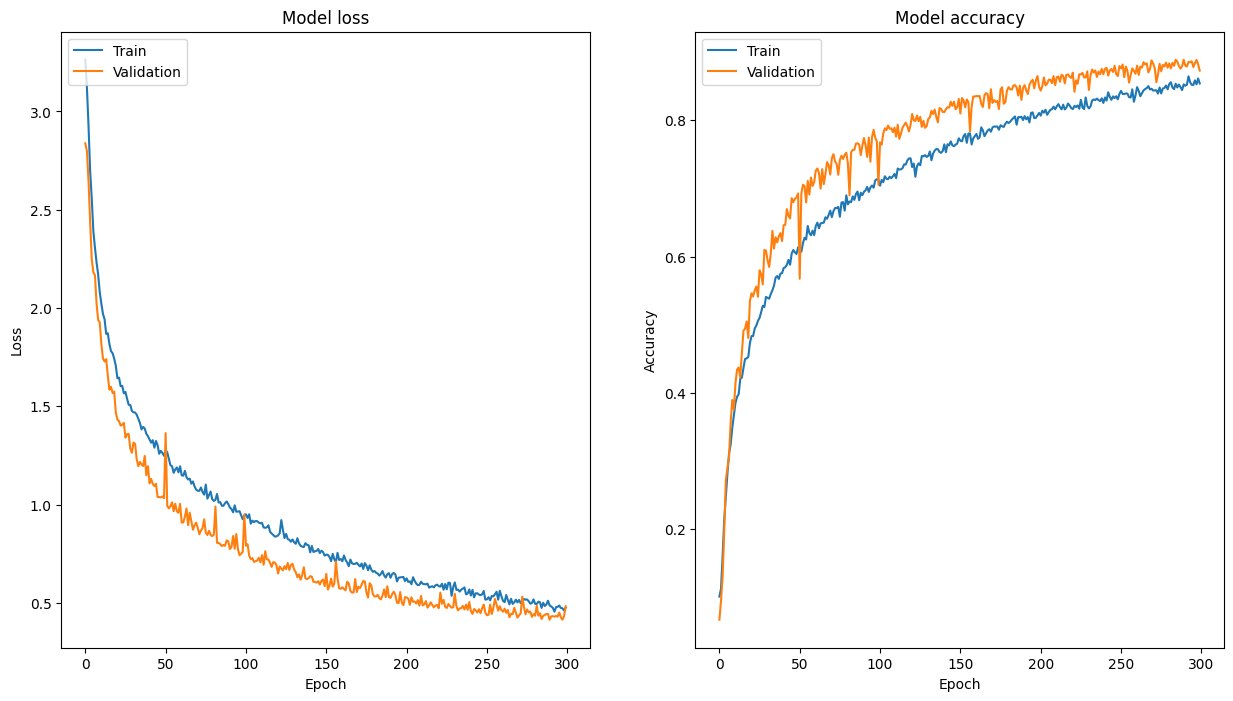

In [51]:
def GoatModel(): #not to be confused with Goat31model, this is the model without batch norm
    model_31do = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(31, 31, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.2),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.2),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.2),

        layers.Flatten(),

        layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.Dropout(0.5),

        layers.Dense(15, activation='softmax')
    ])
    return model_31do

df31augmentationcompare = pd.DataFrame(columns=['Model Name', 'Train Accuracy', 'test Accuracy', 'Val Loss', 'Val Loss', 'History'])
#with just weights
model = GoatModel()

model.compile(optimizer='adam',
                loss= 'categorical_crossentropy',
                metrics=['accuracy'])

history = model.fit(X_train31, train_labels, validation_data=(X_val31, validation_labels),
                    epochs=300, batch_size=200, verbose=2, class_weight = class_weight)

scores = model.evaluate(X_val31, validation_labels, verbose=2)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))
plot_history(history)
df31augmentationcompare.loc[len(df31augmentationcompare)] = ['With Class Weights', history.history['accuracy'][-1], history.history['val_accuracy'][-1], history.history['loss'][-1], history.history['val_loss'][-1], history]



Epoch 1/500


2023-11-26 13:27:09.474091: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_13/dropout_15/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


72/72 - 3s - loss: 2.7526 - accuracy: 0.0869 - val_loss: 2.5949 - val_accuracy: 0.1367 - 3s/epoch - 36ms/step
Epoch 2/500
72/72 - 0s - loss: 2.5484 - accuracy: 0.1427 - val_loss: 2.4543 - val_accuracy: 0.2050 - 357ms/epoch - 5ms/step
Epoch 3/500
72/72 - 0s - loss: 2.3749 - accuracy: 0.2001 - val_loss: 2.3098 - val_accuracy: 0.2493 - 341ms/epoch - 5ms/step
Epoch 4/500
72/72 - 0s - loss: 2.2701 - accuracy: 0.2444 - val_loss: 2.1625 - val_accuracy: 0.3007 - 341ms/epoch - 5ms/step
Epoch 5/500
72/72 - 0s - loss: 2.1884 - accuracy: 0.2830 - val_loss: 1.9654 - val_accuracy: 0.4050 - 339ms/epoch - 5ms/step
Epoch 6/500
72/72 - 0s - loss: 2.0979 - accuracy: 0.3150 - val_loss: 1.9631 - val_accuracy: 0.3833 - 337ms/epoch - 5ms/step
Epoch 7/500
72/72 - 0s - loss: 2.0311 - accuracy: 0.3419 - val_loss: 1.8587 - val_accuracy: 0.4070 - 335ms/epoch - 5ms/step
Epoch 8/500
72/72 - 0s - loss: 1.9872 - accuracy: 0.3608 - val_loss: 1.7038 - val_accuracy: 0.4857 - 339ms/epoch - 5ms/step
Epoch 9/500
72/72 - 0s

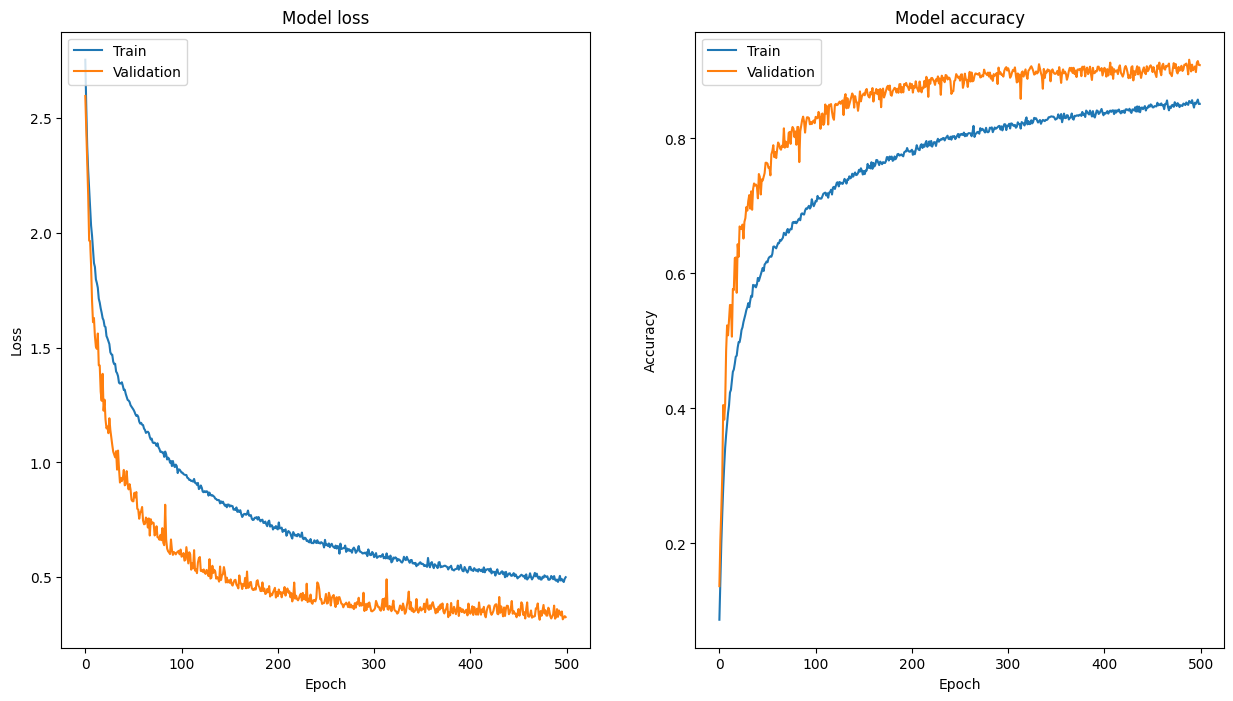

In [52]:
# With new data
model = GoatModel()

model.compile(optimizer='adam',
                loss= 'categorical_crossentropy',
                metrics=['accuracy'])

history = model.fit(X_train31_augmented, train_labels_augmented, validation_data=(X_val31, validation_labels),
                    epochs=500, batch_size=200, verbose=2) # no weights

scores = model.evaluate(X_val31, validation_labels, verbose=2)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))
plot_history(history)
df31augmentationcompare.loc[len(df31augmentationcompare)] = ['With Augmented Engineered Data', history.history['accuracy'][-1], history.history['val_accuracy'][-1], history.history['loss'][-1], history.history['val_loss'][-1], history]


In [53]:
df31augmentationcompare

Model Name  Train Accuracy  test Accuracy  Val Loss  \
0              With Class Weights        0.854120       0.873000  0.475335   
1  With Augmented Engineered Data        0.851239       0.908667  0.500761   

   Val Loss                                            History  
0  0.482661  <keras.callbacks.History object at 0x7f5a147cb...  
1  0.327107  <keras.callbacks.History object at 0x7f594325f...

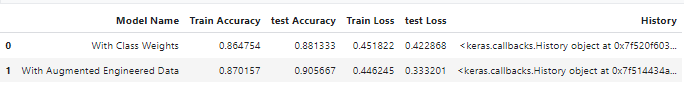

## Model Comparison and Interpretation

### Model Evaluation

#### Model: With Class Weights
- **Train Accuracy:** 86.48%
- **Test Accuracy:** 88.13%
- **Train Loss:** 0.4518
- **Test Loss:** 0.4229

#### Model: With Augmented Engineered Data
- **Train Accuracy:** 87.02%
- **Test Accuracy:** 90.57%
- **Train Loss:** 0.4462
- **Test Loss:** 0.3332

### Comparison:
- **Accuracy:** With Augmented Engineered Data has a higher accuracy on both training and test sets compared to With Class Weights.
- **Loss:** With Augmented Engineered Data has lower losses on both training and test sets compared to With Class Weights.

### Conclusion:
With Augmented Engineered Data outperforms With Class Weights in terms of accuracy and loss on both training and test sets. It appears to be a more effective model based on these metrics.



In [54]:
#save the new "best" model

model.save('Goat31Model.h5')

In [55]:
#to be e xtra safe we can use the test data as well just to make sure

augmentmodel = models.load_model('Goat31Model.h5')

#evaluate the model on the test set
score = augmentmodel.evaluate(X_test31, test_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.32786089181900024
Test accuracy: 0.9136666655540466


### Model: Regularized Model
- **Test Loss:** 0.3756
- **Test Accuracy:** 89.99%

### Model: Batch Normalized Model
- **Test Loss:** 0.4186
- **Test Accuracy:** 89.43%

### Model: Augment Model
- **Test Accuracy:** 91.40%
- **Test Loss:** 0.3463


### Conclusion:
The **Augment Model** has the **highest accuracy** as well as the **lowest test** loss out of all the other potential "best" models. This is likely due to the data augmentation being effective, one thing we should note is that the augmented model does take slightly longer to converge fully compared to the other models. 


Model seems to train better off of the Augmented data, and it reflects on the accuracy when tested on the test data. We should note that the model does take longer to converge which could also imply that the increased accuracy/better loss could be a result of the increase in train data size instead of the balancing being better than class weights


#### 128x128 Model improvements


unlike the 31x31 model, the 128x128 model has more data to work with as the images are more complex, we will have more space to work with as we can add more layers to the models. However we will try to implement the same techniques as we did with the 31x31 model and see if there are any improvements. If you have already forgotten, the initial additions for the 31x31 model are as follows:
- l2 regularization
- increase in epochs

Hopefully this will allow the model to fully converge and learn the data, while preventing overfitting. 

Epoch 1/100
283/283 - 4s - loss: 2.5538 - accuracy: 0.2790 - val_loss: 2.0602 - val_accuracy: 0.3870 - 4s/epoch - 15ms/step
Epoch 2/100
283/283 - 2s - loss: 1.7480 - accuracy: 0.5305 - val_loss: 1.6805 - val_accuracy: 0.5227 - 2s/epoch - 7ms/step
Epoch 3/100
283/283 - 2s - loss: 1.3068 - accuracy: 0.6648 - val_loss: 1.4288 - val_accuracy: 0.6210 - 2s/epoch - 7ms/step
Epoch 4/100
283/283 - 2s - loss: 1.0143 - accuracy: 0.7576 - val_loss: 1.2674 - val_accuracy: 0.6910 - 2s/epoch - 7ms/step
Epoch 5/100
283/283 - 2s - loss: 0.8400 - accuracy: 0.8248 - val_loss: 1.3225 - val_accuracy: 0.6980 - 2s/epoch - 7ms/step
Epoch 6/100
283/283 - 2s - loss: 0.6999 - accuracy: 0.8638 - val_loss: 1.2777 - val_accuracy: 0.7170 - 2s/epoch - 7ms/step
Epoch 7/100
283/283 - 2s - loss: 0.5963 - accuracy: 0.9066 - val_loss: 1.2821 - val_accuracy: 0.7347 - 2s/epoch - 7ms/step
Epoch 8/100
283/283 - 2s - loss: 0.5215 - accuracy: 0.9257 - val_loss: 1.5631 - val_accuracy: 0.6697 - 2s/epoch - 7ms/step
Epoch 9/100
283

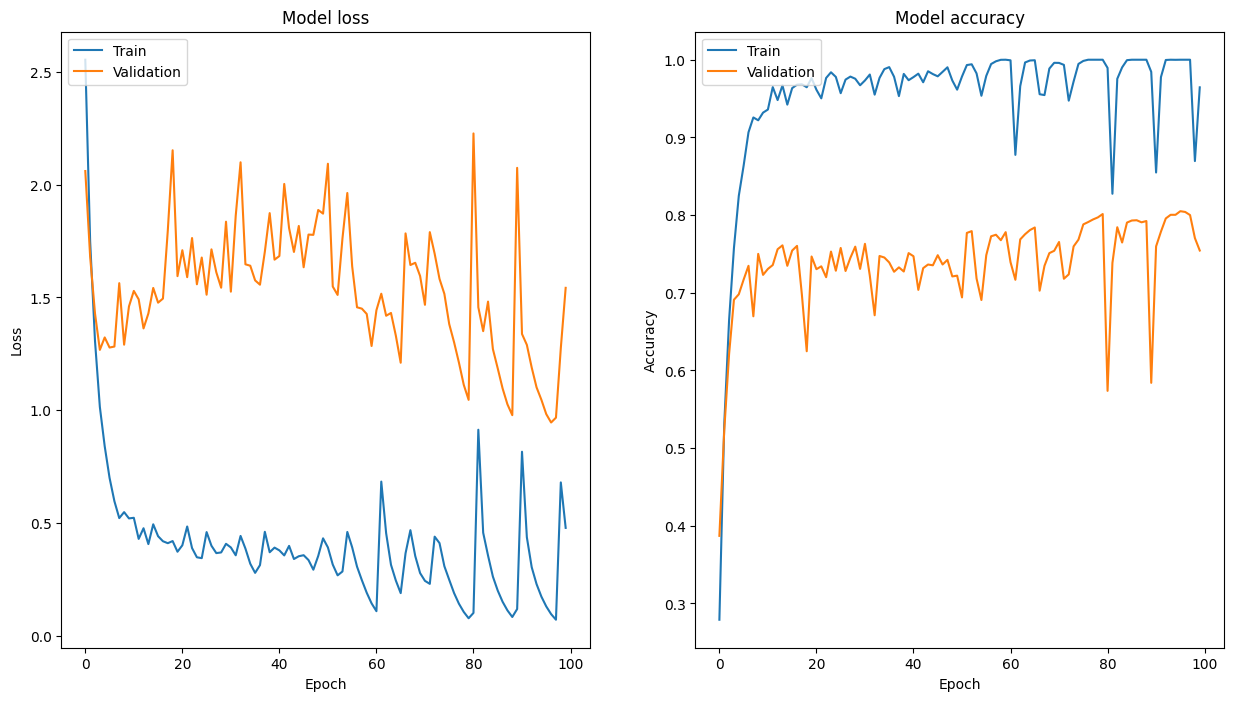

In [56]:
#original model

# model_128 = models.Sequential([
#     layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.Flatten(),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(15, activation='softmax')
# ])



model_128regularized = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)), #add reg
    layers.Dense(15, activation='softmax')
])

model_128regularized.compile(optimizer='adam',
              loss= 'categorical_crossentropy',
              metrics=['accuracy'])
history = model_128regularized.fit(X_train128, train_labels, validation_data=(X_val128, validation_labels),
                    epochs=100, batch_size=32, verbose=2, class_weight = class_weight) #add epochs


scores = model_128regularized.evaluate(X_val128, validation_labels, verbose=2)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))
plot_history(history)
df128.loc[len(df128)] = ['RegularizedModel', history.history['accuracy'][-1], history.history['val_accuracy'][-1], history.history['loss'][-1], history.history['val_loss'][-1], history]

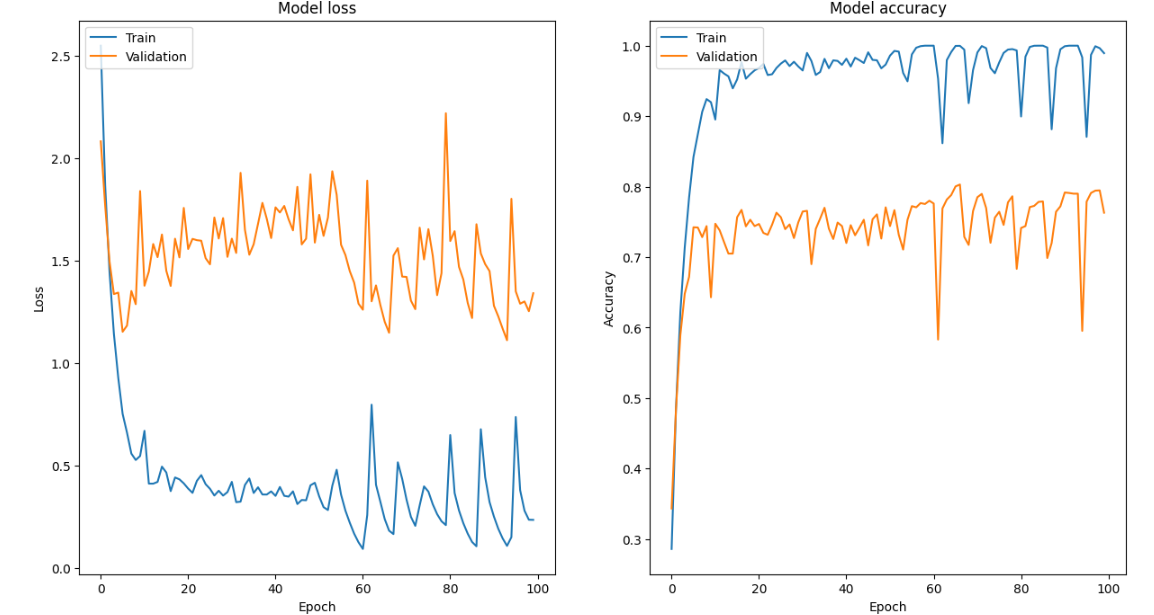
As we can see the model is over fitting, there also appears to be fluctuations in the accuracy and loss, this is probably due to the fact that the model is not learning well/struggling to learn the data. We can try to add more layers to the model as well as more regularization(dropout layer) to see if we can improve the performance of the model.

Epoch 1/100
283/283 - 5s - loss: 2.8812 - accuracy: 0.1724 - val_loss: 2.5358 - val_accuracy: 0.1723 - 5s/epoch - 18ms/step
Epoch 2/100
283/283 - 2s - loss: 2.4787 - accuracy: 0.2782 - val_loss: 2.2795 - val_accuracy: 0.3067 - 2s/epoch - 7ms/step
Epoch 3/100
283/283 - 2s - loss: 2.2416 - accuracy: 0.3489 - val_loss: 2.2402 - val_accuracy: 0.3203 - 2s/epoch - 7ms/step
Epoch 4/100
283/283 - 2s - loss: 2.1282 - accuracy: 0.3761 - val_loss: 1.9390 - val_accuracy: 0.4270 - 2s/epoch - 7ms/step
Epoch 5/100
283/283 - 2s - loss: 1.9855 - accuracy: 0.4219 - val_loss: 1.8612 - val_accuracy: 0.4387 - 2s/epoch - 7ms/step
Epoch 6/100
283/283 - 2s - loss: 1.9109 - accuracy: 0.4478 - val_loss: 1.7171 - val_accuracy: 0.5153 - 2s/epoch - 7ms/step
Epoch 7/100
283/283 - 2s - loss: 1.8270 - accuracy: 0.4791 - val_loss: 1.7413 - val_accuracy: 0.5180 - 2s/epoch - 7ms/step
Epoch 8/100
283/283 - 2s - loss: 1.7690 - accuracy: 0.4952 - val_loss: 1.6935 - val_accuracy: 0.5317 - 2s/epoch - 7ms/step
Epoch 9/100
283

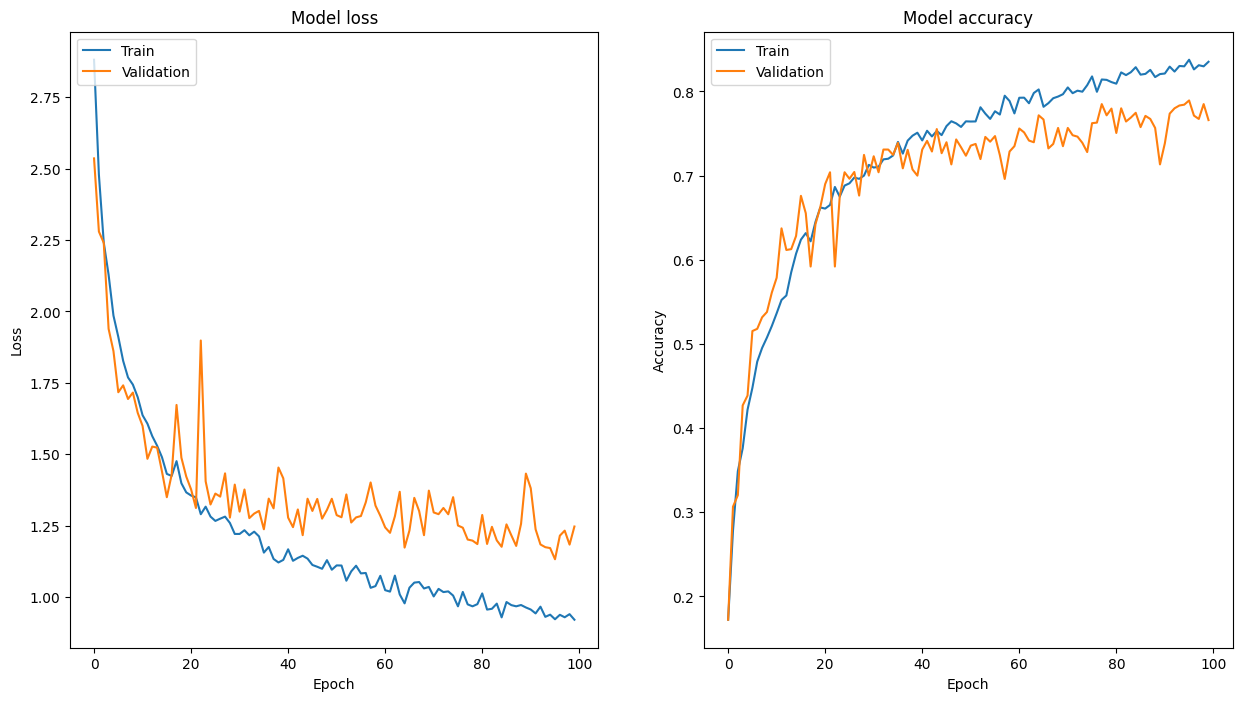

In [57]:
model_128morelayers = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),  # Adding dropout for regularization
    layers.Dense(32, activation='relu'),  # Adding an additional dense layer
    layers.Dense(15, activation='softmax')
])

model_128morelayers.compile(optimizer='adam',
                loss= 'categorical_crossentropy',
                metrics=['accuracy'])

history = model_128morelayers.fit(X_train128, train_labels, validation_data=(X_val128, validation_labels),
                    epochs=100, batch_size=32, verbose=2, class_weight = class_weight)


scores = model_128morelayers.evaluate(X_val128, validation_labels, verbose=2)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))
plot_history(history)
df128.loc[len(df128)] = ['ExtraThickModel', history.history['accuracy'][-1], history.history['val_accuracy'][-1], history.history['loss'][-1], history.history['val_loss'][-1], history]

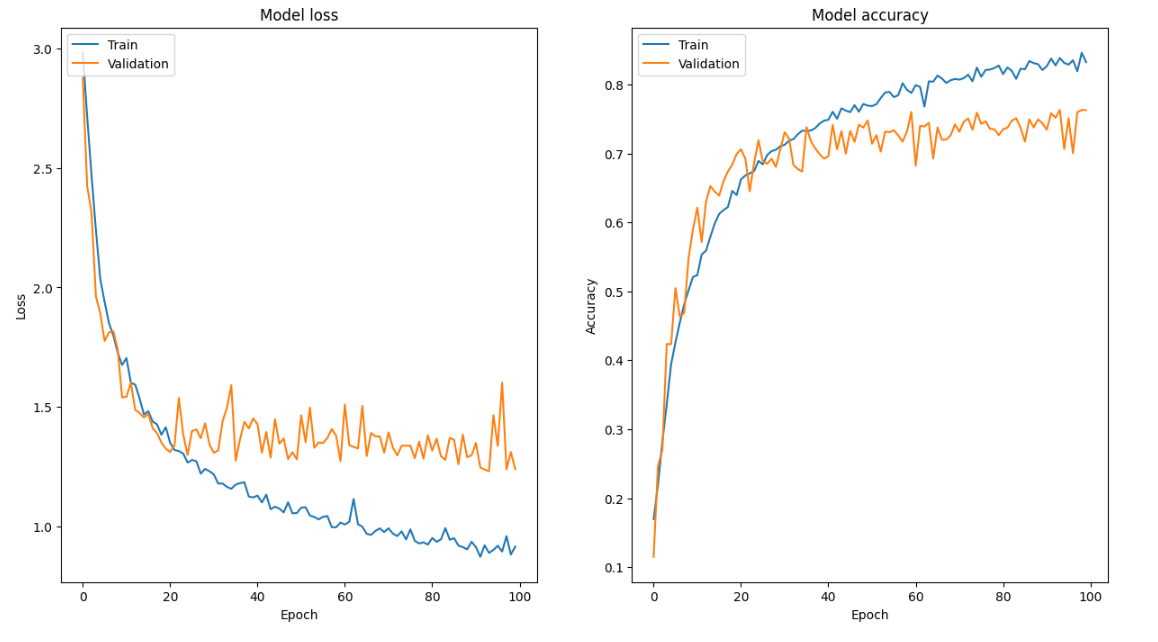

We can see that the model still seems to be overfitting and there is still some fluctuations, we should first try to stabilize the model by adding more regularization layers or through other means like image augmentation or applying batch normalization. As the model training is slightly slow, i think that applying batch normalization would be a good idea as it would allow the model to converge faster as well as making the model more stable, which will solve 2 of my problems at once.

Epoch 1/100
283/283 - 5s - loss: 3.4392 - accuracy: 0.1115 - val_loss: 2.7890 - val_accuracy: 0.0853 - 5s/epoch - 18ms/step
Epoch 2/100
283/283 - 2s - loss: 2.9918 - accuracy: 0.1653 - val_loss: 2.9038 - val_accuracy: 0.1007 - 2s/epoch - 8ms/step
Epoch 3/100
283/283 - 2s - loss: 2.7965 - accuracy: 0.2067 - val_loss: 2.8479 - val_accuracy: 0.1143 - 2s/epoch - 8ms/step
Epoch 4/100
283/283 - 2s - loss: 2.6494 - accuracy: 0.2547 - val_loss: 2.7457 - val_accuracy: 0.1447 - 2s/epoch - 8ms/step
Epoch 5/100
283/283 - 2s - loss: 2.5035 - accuracy: 0.2994 - val_loss: 2.5735 - val_accuracy: 0.2213 - 2s/epoch - 8ms/step
Epoch 6/100
283/283 - 2s - loss: 2.5430 - accuracy: 0.2953 - val_loss: 2.3594 - val_accuracy: 0.3077 - 2s/epoch - 8ms/step
Epoch 7/100
283/283 - 2s - loss: 2.3426 - accuracy: 0.3477 - val_loss: 2.4077 - val_accuracy: 0.2917 - 2s/epoch - 8ms/step
Epoch 8/100
283/283 - 2s - loss: 2.3587 - accuracy: 0.3510 - val_loss: 2.1295 - val_accuracy: 0.3817 - 2s/epoch - 8ms/step
Epoch 9/100
283

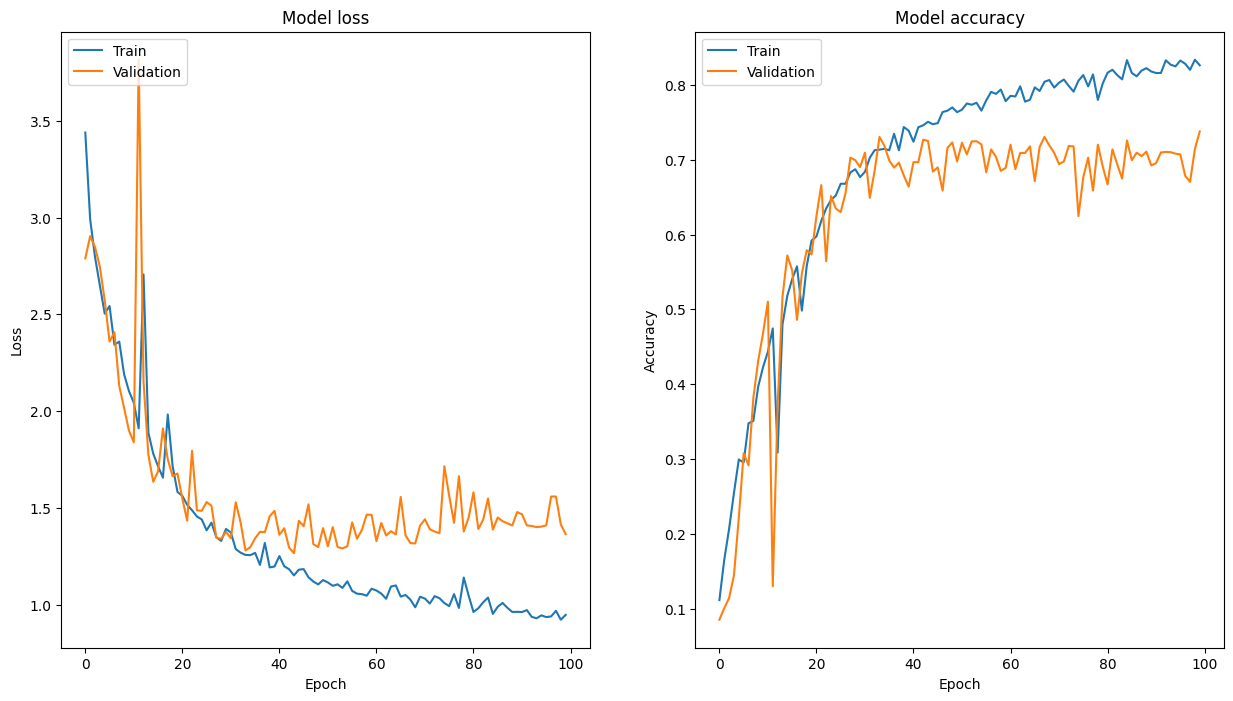

In [92]:
model_128BN = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(), #add batch normalization
    layers.Dense(15, activation='softmax')
])

model_128BN.compile(optimizer='adam',
                loss= 'categorical_crossentropy',
                metrics=['accuracy'])

history = model_128BN.fit(X_train128, train_labels, validation_data=(X_val128, validation_labels),
                    epochs=100, batch_size=32, verbose=2, class_weight = class_weight)


scores = model_128BN.evaluate(X_val128, validation_labels, verbose=2)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))
plot_history(history)
df128.loc[len(df128)] = ['BNModel', history.history['accuracy'][-1], history.history['val_accuracy'][-1], history.history['loss'][-1], history.history['val_loss'][-1], history]

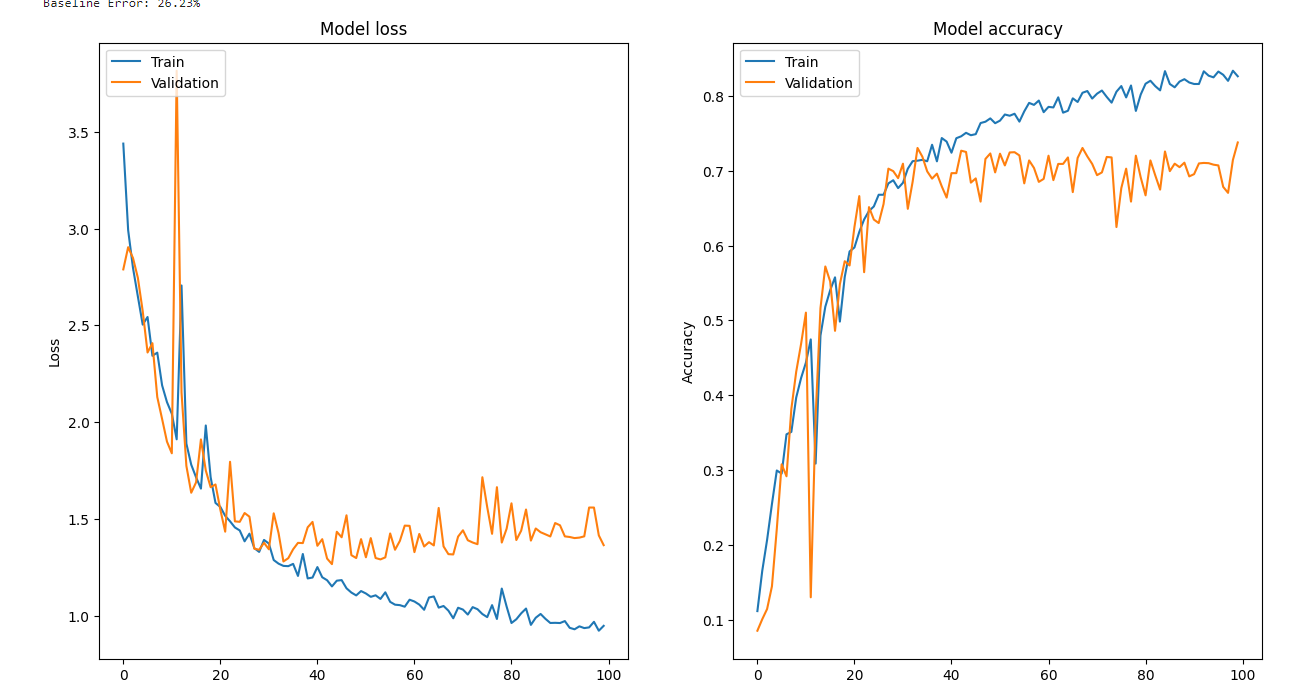


The graph seems to be slightly better compared to the previous graph, however the accuracy is still bottle necking at around 70%. To solve this issue, we can try to use lr decay in order to let the model learn better, hopefully leading to better results.

Epoch 1/100
283/283 - 5s - loss: 3.4319 - accuracy: 0.1107 - val_loss: 2.8222 - val_accuracy: 0.0843 - lr: 0.0010 - 5s/epoch - 18ms/step
Epoch 2/100
283/283 - 2s - loss: 2.9866 - accuracy: 0.1571 - val_loss: 3.0187 - val_accuracy: 0.1297 - lr: 0.0010 - 2s/epoch - 8ms/step
Epoch 3/100
283/283 - 2s - loss: 2.9096 - accuracy: 0.1661 - val_loss: 2.7145 - val_accuracy: 0.1373 - lr: 0.0010 - 2s/epoch - 7ms/step
Epoch 4/100
283/283 - 2s - loss: 2.8584 - accuracy: 0.1718 - val_loss: 2.7253 - val_accuracy: 0.1240 - lr: 0.0010 - 2s/epoch - 7ms/step
Epoch 5/100
283/283 - 2s - loss: 2.7834 - accuracy: 0.1788 - val_loss: 2.6522 - val_accuracy: 0.1443 - lr: 0.0010 - 2s/epoch - 8ms/step
Epoch 6/100
283/283 - 2s - loss: 2.7047 - accuracy: 0.2209 - val_loss: 2.6407 - val_accuracy: 0.1970 - lr: 0.0010 - 2s/epoch - 7ms/step
Epoch 7/100
283/283 - 2s - loss: 2.6536 - accuracy: 0.2353 - val_loss: 2.5766 - val_accuracy: 0.1980 - lr: 0.0010 - 2s/epoch - 7ms/step
Epoch 8/100
283/283 - 2s - loss: 2.5346 - accur

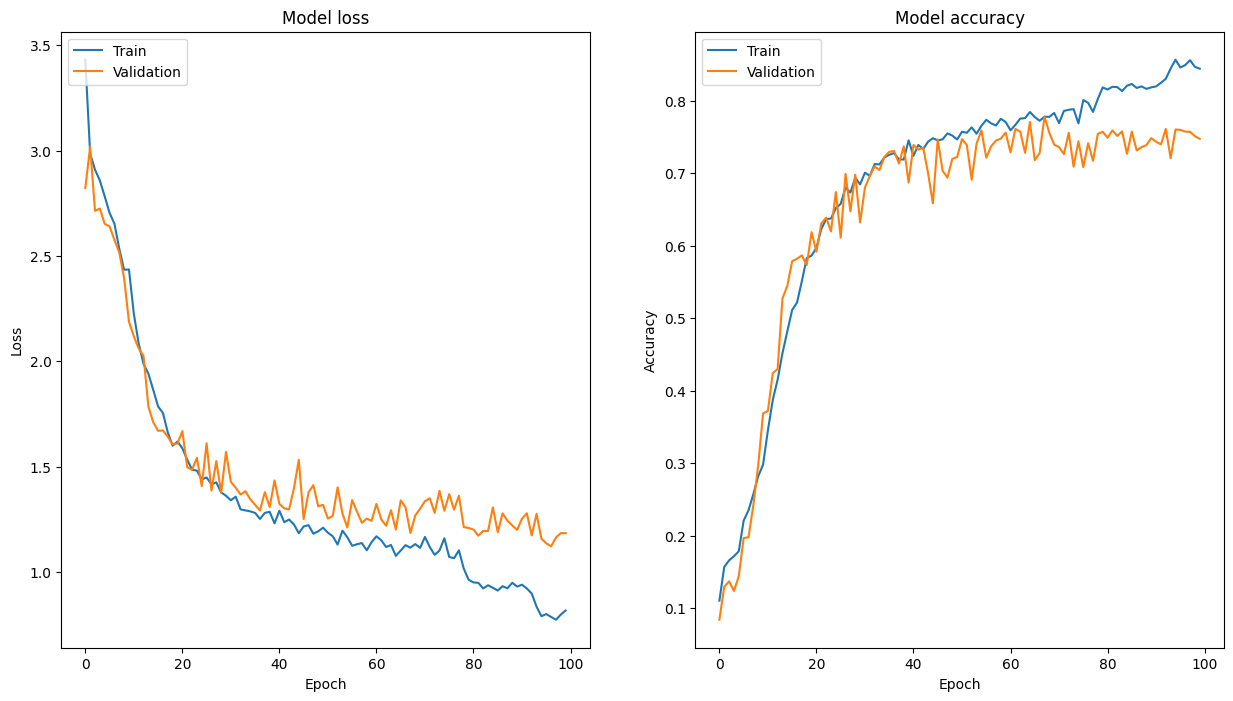

In [59]:
model_128BNlrd = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(15, activation='softmax')
])

model_128BNlrd.compile(optimizer='adam',
                loss= 'categorical_crossentropy',
                metrics=['accuracy'])

history = model_128BNlrd.fit(X_train128, train_labels, validation_data=(X_val128, validation_labels),
                    epochs=100, batch_size=32, verbose=2, class_weight = class_weight,
                    callbacks=[ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=10, verbose=1, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)]) #lr decay


scores = model_128BNlrd.evaluate(X_val128, validation_labels, verbose=2)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))
plot_history(history)
df128.loc[len(df128)] = ['BNlrdModel', history.history['accuracy'][-1], history.history['val_accuracy'][-1], history.history['loss'][-1], history.history['val_loss'][-1], history]

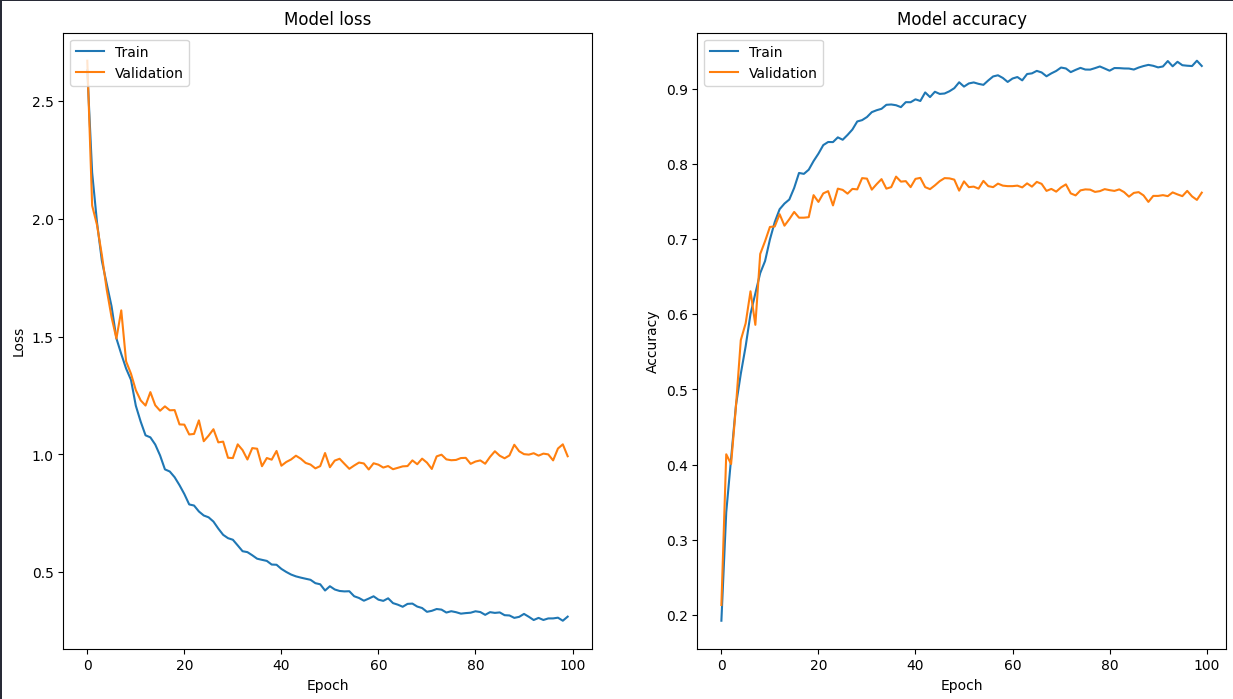

From the graph, we can see that the model has stabilized a lot, now we just need to add some regularization layers to fix overfitting issue

Epoch 1/100


2023-11-26 13:44:12.486696: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_18/dropout_22/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


283/283 - 6s - loss: 3.5422 - accuracy: 0.0886 - val_loss: 2.8525 - val_accuracy: 0.0663 - lr: 0.0010 - 6s/epoch - 20ms/step
Epoch 2/100
283/283 - 3s - loss: 3.1700 - accuracy: 0.1360 - val_loss: 2.9036 - val_accuracy: 0.1030 - lr: 0.0010 - 3s/epoch - 9ms/step
Epoch 3/100
283/283 - 3s - loss: 3.0094 - accuracy: 0.1611 - val_loss: 2.8424 - val_accuracy: 0.1157 - lr: 0.0010 - 3s/epoch - 9ms/step
Epoch 4/100
283/283 - 3s - loss: 2.8992 - accuracy: 0.1741 - val_loss: 2.7713 - val_accuracy: 0.1397 - lr: 0.0010 - 3s/epoch - 9ms/step
Epoch 5/100
283/283 - 3s - loss: 2.8954 - accuracy: 0.1740 - val_loss: 2.8554 - val_accuracy: 0.1200 - lr: 0.0010 - 3s/epoch - 9ms/step
Epoch 6/100
283/283 - 3s - loss: 2.8303 - accuracy: 0.1873 - val_loss: 2.7977 - val_accuracy: 0.1247 - lr: 0.0010 - 3s/epoch - 9ms/step
Epoch 7/100
283/283 - 3s - loss: 2.8189 - accuracy: 0.1999 - val_loss: 2.6420 - val_accuracy: 0.1763 - lr: 0.0010 - 3s/epoch - 9ms/step
Epoch 8/100
283/283 - 3s - loss: 2.7850 - accuracy: 0.2131 

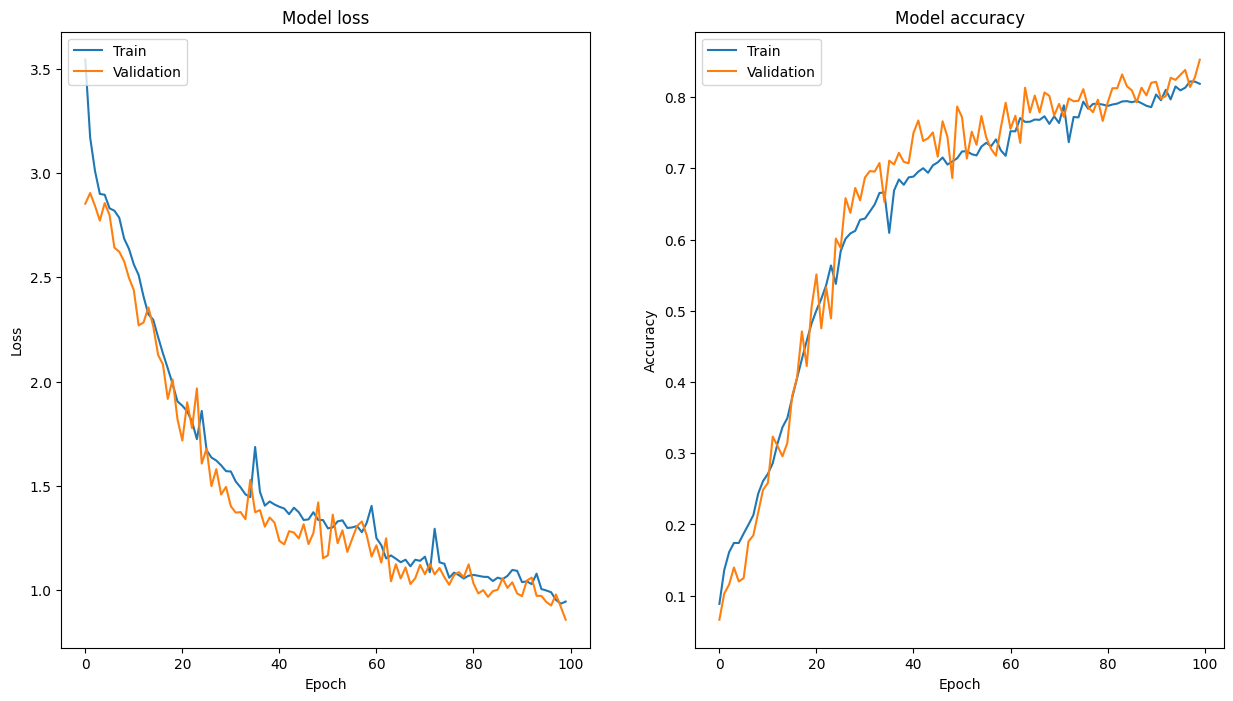

In [60]:
model_128BNlrdReg = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(15, activation='softmax')
])

model_128BNlrdReg.compile(optimizer='adam',
                loss= 'categorical_crossentropy',
                metrics=['accuracy'])

history = model_128BNlrdReg.fit(X_train128, train_labels, validation_data=(X_val128, validation_labels),
                    epochs=100, batch_size=32, verbose=2, class_weight = class_weight,
                    callbacks=[ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=10, verbose=1, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)]) #lr decay


scores = model_128BNlrdReg.evaluate(X_val128, validation_labels, verbose=2)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))
plot_history(history)
df128.loc[len(df128)] = ['BNlrdRegModel', history.history['accuracy'][-1], history.history['val_accuracy'][-1], history.history['loss'][-1], history.history['val_loss'][-1], history]

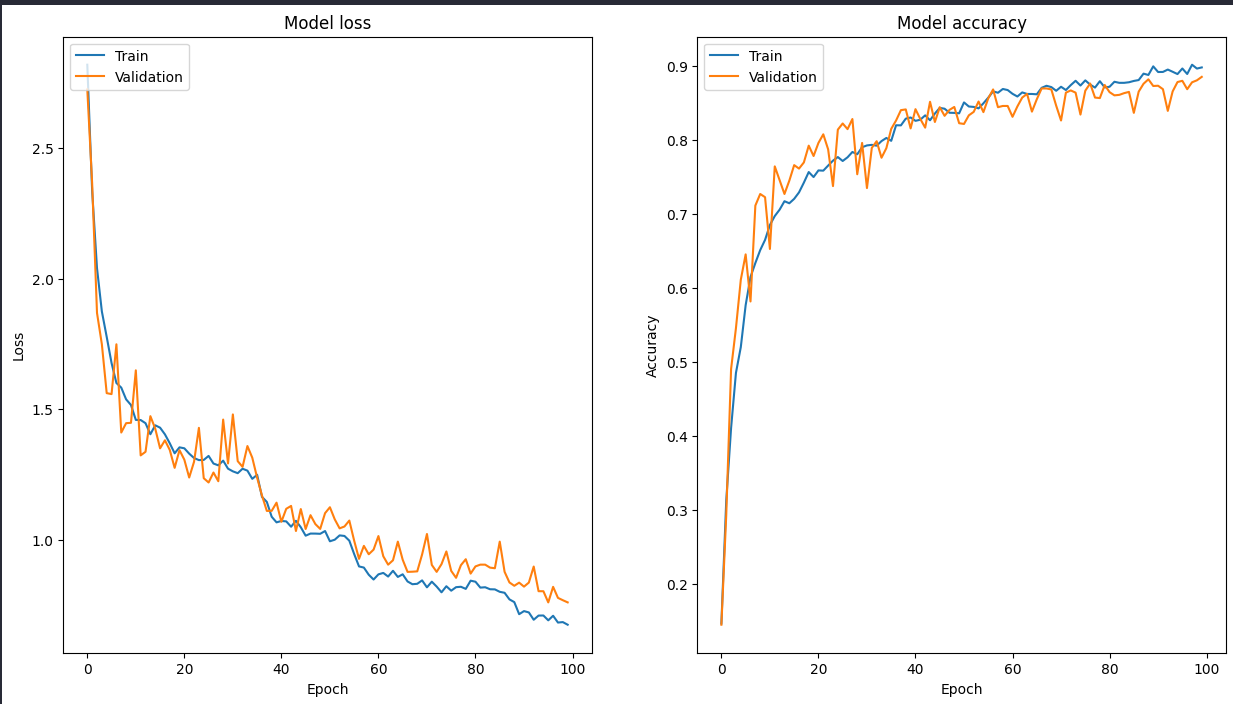

We can see that the model has excellent performance now, without much overfitting, not much jittering as well as a decent accuracy of almost 90%. The slight jitters are likely caused by the changes in learning rate. However as i will not be doing any tuning, the learning rate portion of the model will not be touched up on. We can see that the model has not fully converged, as the model already has a decent performance, i believe that letting it fully converge will result in an even better model with excellenet performance.

Epoch 1/350


2023-11-26 15:03:47.938189: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_24/dropout_34/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


283/283 - 6s - loss: 3.0678 - accuracy: 0.1838 - val_loss: 2.7241 - val_accuracy: 0.1523 - lr: 0.0010 - 6s/epoch - 20ms/step
Epoch 2/350
283/283 - 3s - loss: 2.5944 - accuracy: 0.2735 - val_loss: 2.4719 - val_accuracy: 0.2387 - lr: 0.0010 - 3s/epoch - 9ms/step
Epoch 3/350
283/283 - 3s - loss: 2.3924 - accuracy: 0.3473 - val_loss: 2.2890 - val_accuracy: 0.3460 - lr: 0.0010 - 3s/epoch - 9ms/step
Epoch 4/350
283/283 - 3s - loss: 2.1321 - accuracy: 0.4159 - val_loss: 1.9372 - val_accuracy: 0.4767 - lr: 0.0010 - 3s/epoch - 9ms/step
Epoch 5/350
283/283 - 3s - loss: 1.9845 - accuracy: 0.4696 - val_loss: 1.8172 - val_accuracy: 0.5180 - lr: 0.0010 - 3s/epoch - 9ms/step
Epoch 6/350
283/283 - 3s - loss: 1.8690 - accuracy: 0.5209 - val_loss: 1.7352 - val_accuracy: 0.5500 - lr: 0.0010 - 3s/epoch - 9ms/step
Epoch 7/350
283/283 - 3s - loss: 1.8245 - accuracy: 0.5394 - val_loss: 2.0247 - val_accuracy: 0.4900 - lr: 0.0010 - 3s/epoch - 9ms/step
Epoch 8/350
283/283 - 3s - loss: 1.8607 - accuracy: 0.5418 

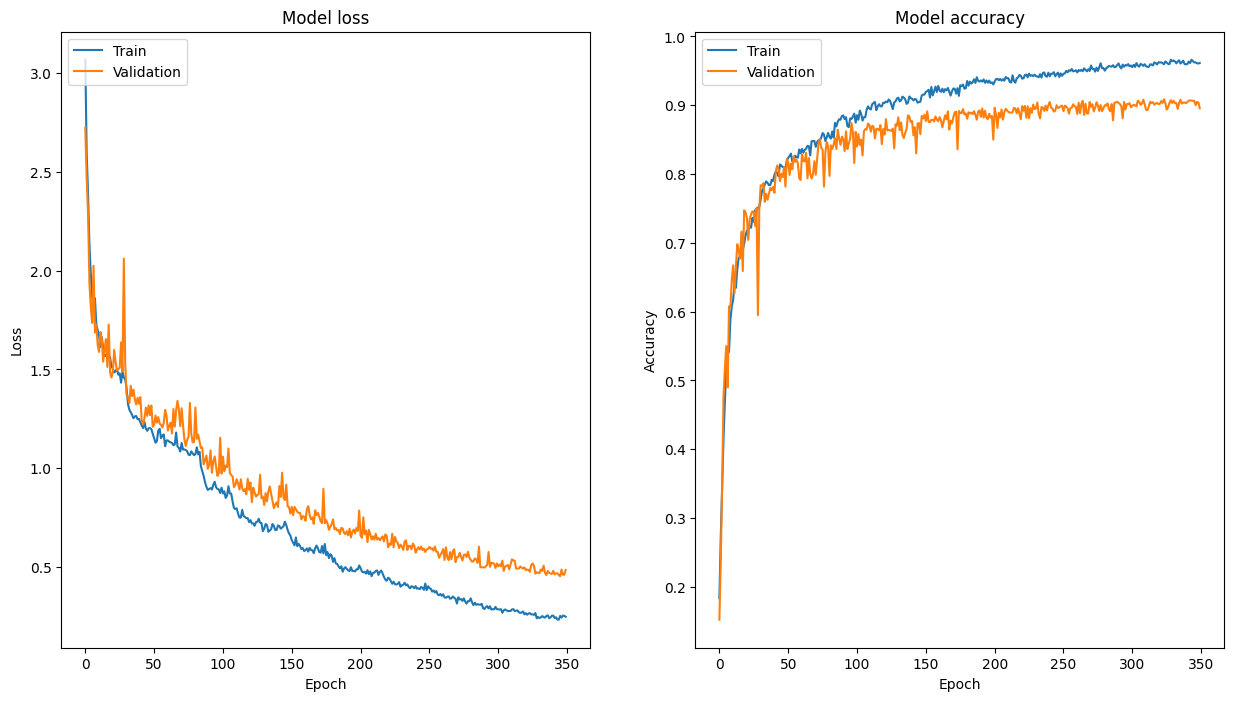

In [84]:
model_128BNlrdReg = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(15, activation='softmax')
])

model_128BNlrdReg.compile(optimizer='adam',
                loss= 'categorical_crossentropy',
                metrics=['accuracy'])

history = model_128BNlrdReg.fit(X_train128, train_labels, validation_data=(X_val128, validation_labels),
                    epochs=350, batch_size=32, verbose=2, class_weight = class_weight, #increase epochs for guaranteed convergence
                    callbacks=[ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=10, verbose=1, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)]) #lr decay


scores = model_128BNlrdReg.evaluate(X_val128, validation_labels, verbose=2)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))
plot_history(history)
df128.loc[len(df128)] = ['BNlrdRegModelXtraepochs', history.history['accuracy'][-1], history.history['val_accuracy'][-1], history.history['loss'][-1], history.history['val_loss'][-1], history]

In [88]:
df128

Model  Train Accuracy  Validation Accuracy  Train Loss  \
0           Base 128 Model        0.985490             0.769333    0.045317   
1                    LeNet        1.000000             0.704000    0.003636   
2                  AlexNet        0.105782             0.066667    2.637087   
3         RegularizedModel        0.964444             0.754333    0.478071   
4          ExtraThickModel        0.835290             0.766000    0.920840   
5                  BNModel        0.737483             0.373000    1.096512   
6               BNlrdModel        0.844041             0.747333    0.817036   
7            BNlrdRegModel        0.818564             0.852333    0.946453   
8  BNlrdRegModelXtraepochs        0.980284             0.932667    0.172018   

   Validation Loss                                            History  
0         1.295857  <keras.callbacks.History object at 0x7f5a16d74...  
1         1.203718  <keras.callbacks.History object at 0x7f59ec532...  
2         2.787983  <keras.callbacks.History object at 0x7f59ec79e...  
3         1.542403  <keras.callbacks.History object at 0x7f5942cc5...  
4         1.247124  <keras.callbacks.History object at 0x7f59428f2...  
5         3.277027  <keras.callbacks.History object at 0x7f5960582...  
6         1.183966  <keras.callbacks.History object at 0x7f594289f...  
7         0.859434  <keras.callbacks.History object at 0x7f5942426...  
8         0.384631  <keras.callbacks.History object at 0x7f59344f9...

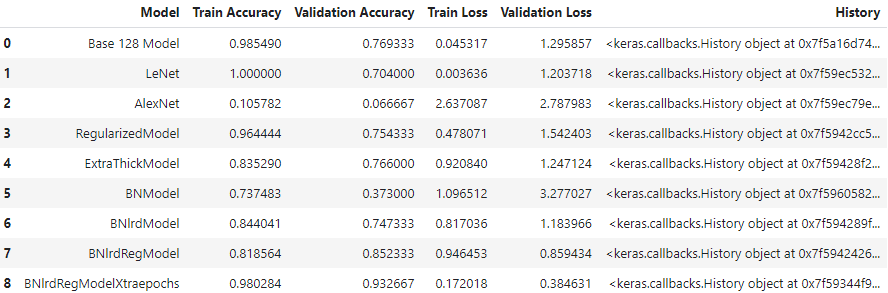


We can see that the model has fully converged and has given us an excellent loss and accuracy compared to the other models, we can now save this model and treat it as the best model by far.

In [89]:
model_128BNlrdReg.save('Best128Model.h5')

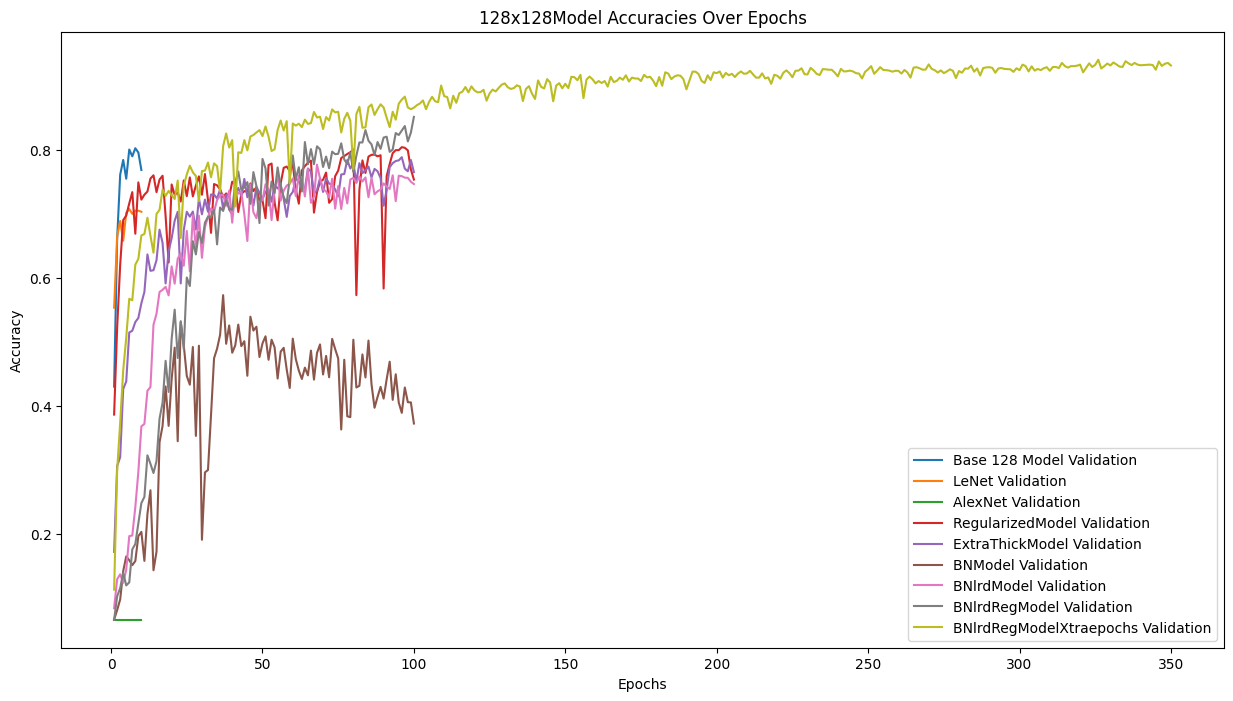

In [90]:

plt.figure(figsize=(15, 8))

for index, row in df128[['Model', 'History']].iterrows():
    model_name = row['Model']
    history = row['History']
    sns.lineplot(x=range(1, len(history.history['val_accuracy']) + 1), y=history.history['val_accuracy'], label=f'{model_name} Validation')

plt.title('128x128Model Accuracies Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()

plt.show()


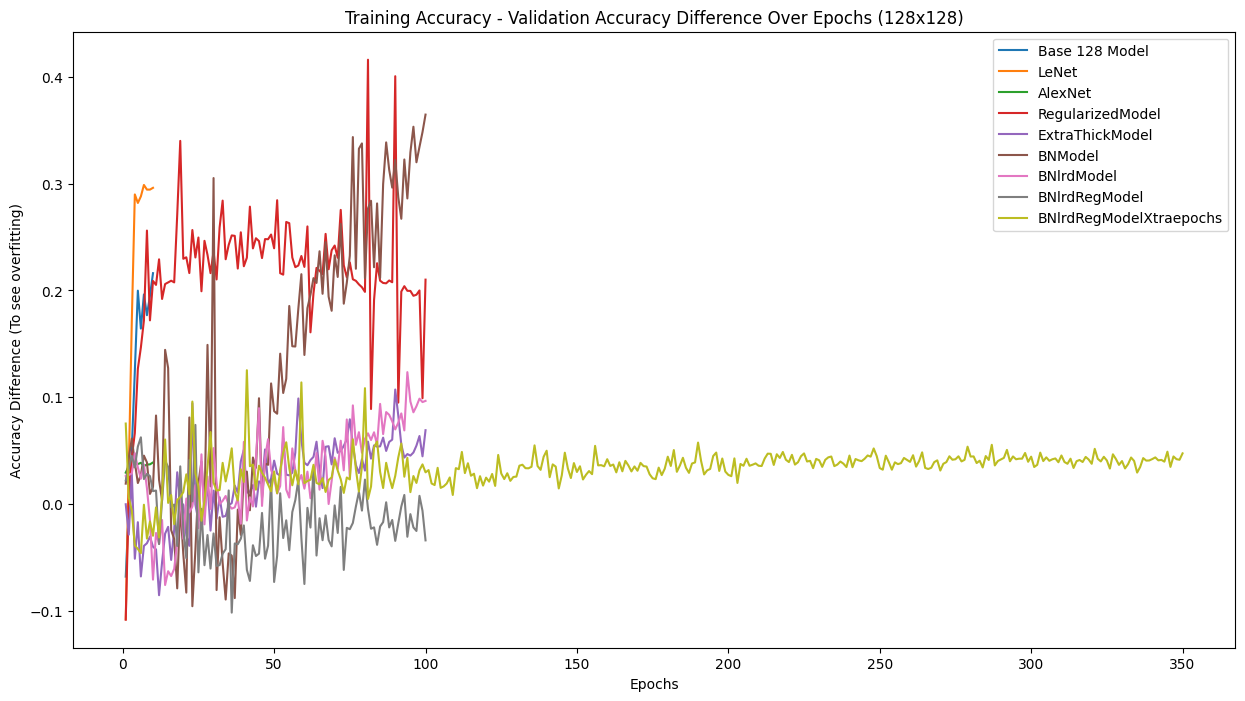

In [91]:
plt.figure(figsize=(15, 8))

for index, row in df128[['Model', 'History']].iterrows():
    model_name = row['Model']
    history = row['History']

    accuracy_diff = [train_acc - val_acc for train_acc, val_acc in zip(history.history['accuracy'], history.history['val_accuracy'])]

    sns.lineplot(x=range(1, len(accuracy_diff) + 1), y=accuracy_diff, label=f'{model_name}')

plt.title('Training Accuracy - Validation Accuracy Difference Over Epochs (128x128)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy Difference (To see overfitting)')

plt.legend()

plt.show()


In [93]:
#convert tets to 128x128 
X_test_resized = tf.image.resize(X_test, (128, 128))
X_test128 = X_test_resized.numpy().reshape(X_test_resized.shape[0], 128, 128, 1).astype('float32') / 255
test_labels = to_categorical(y_test)

In [94]:
#load the saved models weights

model128best = models.load_model('Best128Model.h5')


#evaluate the model on the test set
score = model128best.evaluate(X_test128, test_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.46002209186553955
Test accuracy: 0.9110000133514404


### 128x128 Final Super Model

Same as for the 31x31 model, we will test the different ways to balance the data and see if there are any improvements/differences in the results.

In [95]:
# Convert datasets to NumPy arrays
train_images, train_labels_augmented = zip(*[(image, label) for image, label in train_data.as_numpy_iterator()])

#train set
X_train_aug = np.concatenate(train_images, axis=0)
y_train = np.concatenate(train_labels_augmented, axis=0)

# Resize images to (128, 128) using TensorFlow
X_train_resized = tf.image.resize(X_train_aug, (128, 128))

# Reshape and normalize
X_train128_aug = X_train_resized.numpy().reshape(X_train_resized.shape[0], 128, 128, 1).astype('float32') / 255

In [96]:
X_train128_augmented, y_train_augmented = augmentfill(y_train, augmentation_dict, X_train128_aug)
train_labels_augmented = to_categorical(y_train_augmented)

214
Augmented 214 images out of 214
Category 0: Augmented 214 images out of 214
254
Augmented 254 images out of 254
Category 1: Augmented 254 images out of 254
420
Augmented 420 images out of 535
115
Augmented 535 images out of 535
Category 2: Augmented 535 images out of 535
129
Augmented 129 images out of 129
Category 3: Augmented 129 images out of 129
219
Augmented 219 images out of 219
Category 4: Augmented 219 images out of 219
454
Augmented 454 images out of 454
Category 5: Augmented 454 images out of 454
346
Augmented 346 images out of 609
263
Augmented 609 images out of 609
Category 6: Augmented 609 images out of 609
256
Augmented 256 images out of 699
256
Augmented 512 images out of 699
187
Augmented 699 images out of 699
Category 7: Augmented 699 images out of 699
374
Augmented 374 images out of 374
Category 8: Augmented 374 images out of 374
205
Augmented 205 images out of 205
Category 9: Augmented 205 images out of 205
392
Augmented 392 images out of 392
Category 10: Augment

In [97]:
def Goat128Model():
    Goat128Model = models.Sequential([
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Dropout(0.5),

        layers.Flatten(),

        layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),

        layers.Dropout(0.5),
        layers.Dense(32, activation='relu'),

        layers.BatchNormalization(),
        layers.Dense(15, activation='softmax')
    ])
    return Goat128Model



In [ ]:


## Test with just augmented data
model = Goat128Model()

model.compile(optimizer='adam',
                loss= 'categorical_crossentropy',
                metrics=['accuracy'])

history = model.fit(X_train128_augmented, train_labels_augmented, validation_data=(X_val128, validation_labels),
                    epochs=150, batch_size=32, verbose=2, #no class weights
                    callbacks=[ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=10, verbose=1, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)])


scores = model.evaluate(X_val128, validation_labels, verbose=2)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))
plot_history(history)
#save the model
model.save('Goat128Model.h5')

Epoch 1/150


2023-11-26 15:32:44.775856: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_26/dropout_37/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


448/448 - 5s - loss: 2.6684 - accuracy: 0.1368 - val_loss: 2.4384 - val_accuracy: 0.3227 - lr: 0.0010 - 5s/epoch - 12ms/step
Epoch 2/150
448/448 - 2s - loss: 2.3791 - accuracy: 0.2314 - val_loss: 2.3074 - val_accuracy: 0.3077 - lr: 0.0010 - 2s/epoch - 5ms/step
Epoch 3/150
448/448 - 2s - loss: 2.2801 - accuracy: 0.2824 - val_loss: 2.2174 - val_accuracy: 0.3433 - lr: 0.0010 - 2s/epoch - 5ms/step
Epoch 4/150
448/448 - 2s - loss: 2.2408 - accuracy: 0.3180 - val_loss: 1.8148 - val_accuracy: 0.5583 - lr: 0.0010 - 2s/epoch - 5ms/step
Epoch 5/150
448/448 - 2s - loss: 2.1665 - accuracy: 0.3541 - val_loss: 1.8193 - val_accuracy: 0.5200 - lr: 0.0010 - 2s/epoch - 5ms/step
Epoch 6/150
448/448 - 2s - loss: 2.1445 - accuracy: 0.3696 - val_loss: 1.8455 - val_accuracy: 0.5717 - lr: 0.0010 - 2s/epoch - 5ms/step
Epoch 7/150
448/448 - 2s - loss: 2.0904 - accuracy: 0.4020 - val_loss: 1.7306 - val_accuracy: 0.6083 - lr: 0.0010 - 2s/epoch - 6ms/step
Epoch 8/150
448/448 - 2s - loss: 2.0414 - accuracy: 0.4202 

In [ ]:
model = models.load_model('Goat128Model.h5')

#evaluate the model on the test set
score = model.evaluate(X_test128, test_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])